In [ ]:
# Cell 1: Imports and basic settings

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter

# Plot settings
plt.rcParams["figure.figsize"] = (8, 5)
plt.rcParams["axes.grid"] = True
sns.set(style="whitegrid")

RANDOM_STATE = 42


In [424]:
# Cell 2: Load data

DATA_PATH = r"C:\Users\admin\Desktop\Dataset\Validation_Data_by_AR.csv"  # update if needed

df = pd.read_csv(DATA_PATH)

print("Shape:", df.shape)
print("\nColumns:")
print(df.columns.tolist())

print("\nFirst 5 rows:")
display(df.head())


Shape: (95933, 32)

Columns:
['grad_mean', 'grad_std', 'grad_median', 'grad_min', 'grad_max', 'grad_skewness', 'grad_kurtosis', 'nl_length', 'nl_num_fragments', 'nl_grad_weighted_length', 'nl_curv_mean', 'nl_curv_std', 'nl_curv_median', 'nl_curv_min', 'nl_curv_max', 'nl_bend_energy_mean', 'nl_bend_energy_std', 'nl_bend_energy_median', 'nl_bend_energy_min', 'nl_bend_energy_max', 'wavelet_energy_1', 'wavelet_energy_2', 'wavelet_energy_3', 'wavelet_energy_4', 'wavelet_energy_5', 'flux_unsigned', 'flux_signed', 'flux_negative', 'flux_positive', 'class_label', 'flare_strength', 'image_path']

First 5 rows:


,grad_mean,grad_std,grad_median,grad_min,grad_max,grad_skewness,grad_kurtosis,nl_length,nl_num_fragments,nl_grad_weighted_length,...,wavelet_energy_3,wavelet_energy_4,wavelet_energy_5,flux_unsigned,flux_signed,flux_negative,flux_positive,class_label,flare_strength,image_path
0,0.088865,0.123889,0.067672,6.970000e-15,0.062065,0.065042,0.005481,0.004564,0.007859,0.454516,...,0.077134,0.063655,0.064294,0.039729,0.955609,0.484761,0.031962,0,0,1064_hmi.M_720s.20100501_000000_TAI.1.magnetog...
1,0.088015,0.123875,0.065964,0.000000e+00,0.061718,0.064940,0.005449,0.006460,0.010478,0.454045,...,0.077012,0.063388,0.064738,0.039485,0.955798,0.484666,0.031735,0,0,1064_hmi.M_720s.20100501_001200_TAI.1.magnetog...
2,0.088024,0.124069,0.065912,2.773501e-01,0.065522,0.065113,0.005458,0.005863,0.010478,0.457687,...,0.076065,0.064053,0.064150,0.039331,0.955774,0.484451,0.031661,0,0,1064_hmi.M_720s.20100501_002400_TAI.1.magnetog...
3,0.088125,0.124757,0.065166,2.460000e-15,0.061962,0.064936,0.005430,0.007197,0.012133,0.442897,...,0.075074,0.064159,0.064113,0.039374,0.955674,0.484395,0.031734,0,0,1064_hmi.M_720s.20100501_003600_TAI.1.magnetog...
4,0.088481,0.125191,0.065047,4.690000e-15,0.059259,0.063794,0.005219,0.002703,0.003033,0.444012,...,0.075782,0.063614,0.065080,0.039516,0.955530,0.484414,0.031883,0,0,1064_hmi.M_720s.20100501_004800_TAI.1.magnetog...


In [425]:
# Cell 3: Basic info and missing values

print("Data types:")
print(df.dtypes)

print("\nMissing values per column:")
print(df.isna().sum())

print("\nBasic statistics for numeric columns:")
display(df.describe().T)


Data types:
grad_mean                  float64
grad_std                   float64
grad_median                float64
grad_min                   float64
grad_max                   float64
grad_skewness              float64
grad_kurtosis              float64
nl_length                  float64
nl_num_fragments           float64
nl_grad_weighted_length    float64
nl_curv_mean               float64
nl_curv_std                float64
nl_curv_median             float64
nl_curv_min                float64
nl_curv_max                  int64
nl_bend_energy_mean        float64
nl_bend_energy_std         float64
nl_bend_energy_median      float64
nl_bend_energy_min           int64
nl_bend_energy_max         float64
wavelet_energy_1           float64
wavelet_energy_2           float64
wavelet_energy_3           float64
wavelet_energy_4           float64
wavelet_energy_5           float64
flux_unsigned              float64
flux_signed                float64
flux_negative              float64
flux_pos

,count,mean,std,min,25%,50%,75%,max
grad_mean,95933.0,0.174899,0.075131,0.012891,1.203203e-01,1.638163e-01,2.151723e-01,0.544094
grad_std,95933.0,0.217303,0.076881,0.005699,1.615020e-01,2.118147e-01,2.644693e-01,0.631909
grad_median,95933.0,0.081701,0.019326,0.000000,7.026936e-02,8.165866e-02,9.310570e-02,0.348695
grad_min,95933.0,0.034761,0.091871,0.000000,4.350000e-16,1.380000e-15,3.080000e-15,0.392232
grad_max,95933.0,0.079808,0.057634,0.001759,5.603287e-02,6.698668e-02,8.137809e-02,0.709319
grad_skewness,95933.0,0.046534,0.041291,0.013147,2.994075e-02,3.920233e-02,4.922083e-02,0.683737
grad_kurtosis,95933.0,0.005114,0.018525,0.000462,1.535546e-03,2.314660e-03,3.383618e-03,0.618010
nl_length,95933.0,0.005678,0.008308,0.000000,2.492627e-03,4.037354e-03,6.284230e-03,0.267975
nl_num_fragments,95933.0,0.008249,0.018017,0.000000,2.895354e-03,4.687715e-03,7.445195e-03,0.521439
nl_grad_weighted_length,95933.0,0.369923,0.066021,0.134048,3.254719e-01,3.722192e-01,4.138136e-01,0.703835


In [426]:
# Cell 4: Separate features and labels

all_cols = df.columns.tolist()

# Known non-feature columns
non_feature_cols = ["class_label", "flare_strength", "image_path"]

feature_cols = [c for c in all_cols if c not in non_feature_cols]

print("Number of feature columns:", len(feature_cols))
print("Feature columns:")
print(feature_cols)

print("\nNon-feature columns:")
print(non_feature_cols)


Number of feature columns: 29
Feature columns:
['grad_mean', 'grad_std', 'grad_median', 'grad_min', 'grad_max', 'grad_skewness', 'grad_kurtosis', 'nl_length', 'nl_num_fragments', 'nl_grad_weighted_length', 'nl_curv_mean', 'nl_curv_std', 'nl_curv_median', 'nl_curv_min', 'nl_curv_max', 'nl_bend_energy_mean', 'nl_bend_energy_std', 'nl_bend_energy_median', 'nl_bend_energy_min', 'nl_bend_energy_max', 'wavelet_energy_1', 'wavelet_energy_2', 'wavelet_energy_3', 'wavelet_energy_4', 'wavelet_energy_5', 'flux_unsigned', 'flux_signed', 'flux_negative', 'flux_positive']

Non-feature columns:
['class_label', 'flare_strength', 'image_path']


In [427]:
# Cell 5: Existing label distributions

print("class_label value counts:")
print(df["class_label"].value_counts())

print("\nflare_strength (top 20):")
print(df["flare_strength"].value_counts().head(20))


class_label value counts:
class_label
0    76142
1    19791
Name: count, dtype: int64

flare_strength (top 20):
flare_strength
0       76142
C1.2      980
C2.2      876
C1.4      870
C1.3      865
C2.1      767
C1.0      744
C1.8      738
C1.1      592
C1.7      553
C1.6      548
C2.4      542
C2.0      508
C6.3      433
C3.3      417
C1.9      414
C2.5      379
M9.3      356
C3.0      337
C4.0      332
Name: count, dtype: int64


In [428]:
# Cell 6: Map flare_strength to 4 coarse classes: "0", "C", "M", "X"

def map_flare_class(fs):
    """
    Map detailed flare_strength to one of:
    "0" (no flare), "C", "M", "X".
    """
    # Handle numeric 0 or string "0"
    if fs == 0 or str(fs) == "0":
        return "0"
    
    s = str(fs)
    if s.startswith("C"):
        return "C"
    if s.startswith("M"):
        return "M"
    if s.startswith("X"):
        return "X"
    
    # Fallback category if something unexpected appears
    return "other"

df["flare_class4"] = df["flare_strength"].apply(map_flare_class)

print("flare_class4 value counts:")
print(df["flare_class4"].value_counts())


flare_class4 value counts:
flare_class4
0    76142
C    16975
M     2578
X      238
Name: count, dtype: int64


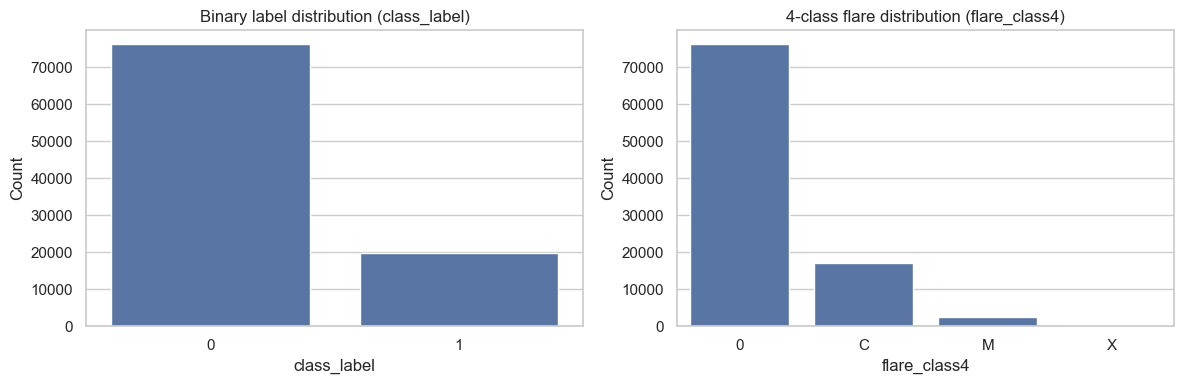

In [429]:
# Cell 7: Plot distributions of labels (binary and 4-class)

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Binary class_label
sns.countplot(
    x="class_label",
    data=df,
    ax=axes[0]
)
axes[0].set_title("Binary label distribution (class_label)")
axes[0].set_xlabel("class_label")
axes[0].set_ylabel("Count")

# 4-class flare_class4
sns.countplot(
    x="flare_class4",
    data=df,
    order=["0", "C", "M", "X"],
    ax=axes[1]
)
axes[1].set_title("4-class flare distribution (flare_class4)")
axes[1].set_xlabel("flare_class4")
axes[1].set_ylabel("Count")

plt.tight_layout()
plt.show()


In [430]:
# Optional: print class ratios

def print_class_ratios(series, name=""):
    counts = series.value_counts()
    total = len(series)
    print(f"\n{name} ratios:")
    for c, v in counts.items():
        print(f"  {c}: {v} ({v / total:.3%})")

print_class_ratios(df["class_label"], "class_label")
print_class_ratios(df["flare_class4"], "flare_class4")



class_label ratios:
  0: 76142 (79.370%)
  1: 19791 (20.630%)

flare_class4 ratios:
  0: 76142 (79.370%)
  C: 16975 (17.695%)
  M: 2578 (2.687%)
  X: 238 (0.248%)


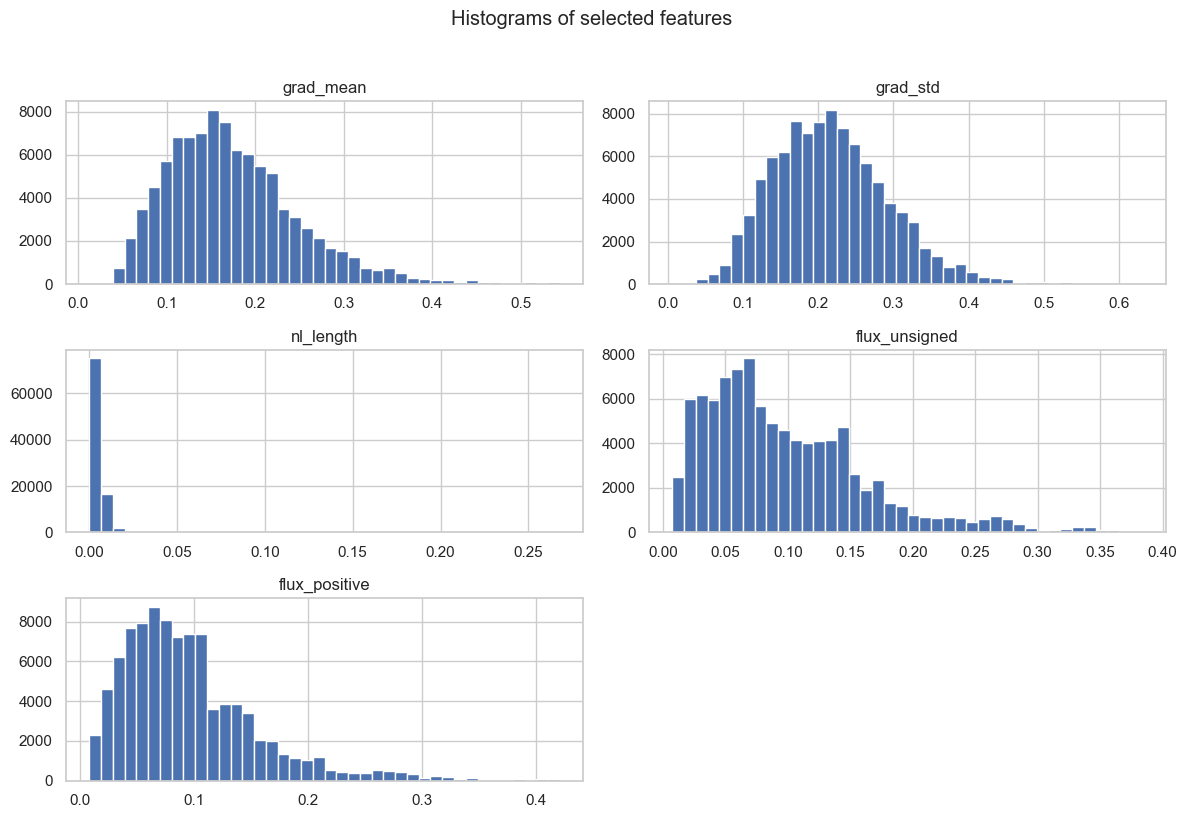

In [431]:
# Cell 8: Quick look at feature distributions (sample)

# Pick a small subset of features to plot
sample_features = [
    "grad_mean",
    "grad_std",
    "nl_length",
    "flux_unsigned",
    "flux_positive"
]

df[sample_features].hist(bins=40, figsize=(12, 8))
plt.suptitle("Histograms of selected features", y=1.02)
plt.tight_layout()
plt.show()


# FEATURE SELECTION

## Block A – Filter Methods

In [432]:
from sklearn.feature_selection import VarianceThreshold

# Low-variance filter
var_thresh = VarianceThreshold(threshold=0.0)
var_thresh.fit(df[feature_cols])

low_var_features = [
    feature_cols[i]
    for i, keep in enumerate(var_thresh.get_support())
    if not keep
]

print("Low-variance features:", low_var_features)

# Drop them
df_filtered = df.drop(columns=low_var_features)

# Update feature list
feature_cols_filtered = [c for c in feature_cols if c not in low_var_features]

# Correlation filter
corr = df_filtered[feature_cols_filtered].corr().abs()
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
high_corr_features = [column for column in upper.columns if any(upper[column] > 0.95)]

print("\nHighly correlated features:", high_corr_features)

df_filtered = df_filtered.drop(columns=high_corr_features)
feature_cols_filtered = [c for c in feature_cols_filtered if c not in high_corr_features]

print("\nRemaining feature count:", len(feature_cols_filtered))


Low-variance features: ['nl_curv_max', 'nl_bend_energy_min']

Highly correlated features: ['nl_num_fragments', 'wavelet_energy_1', 'wavelet_energy_2', 'wavelet_energy_3', 'wavelet_energy_4', 'wavelet_energy_5', 'flux_positive']

Remaining feature count: 20


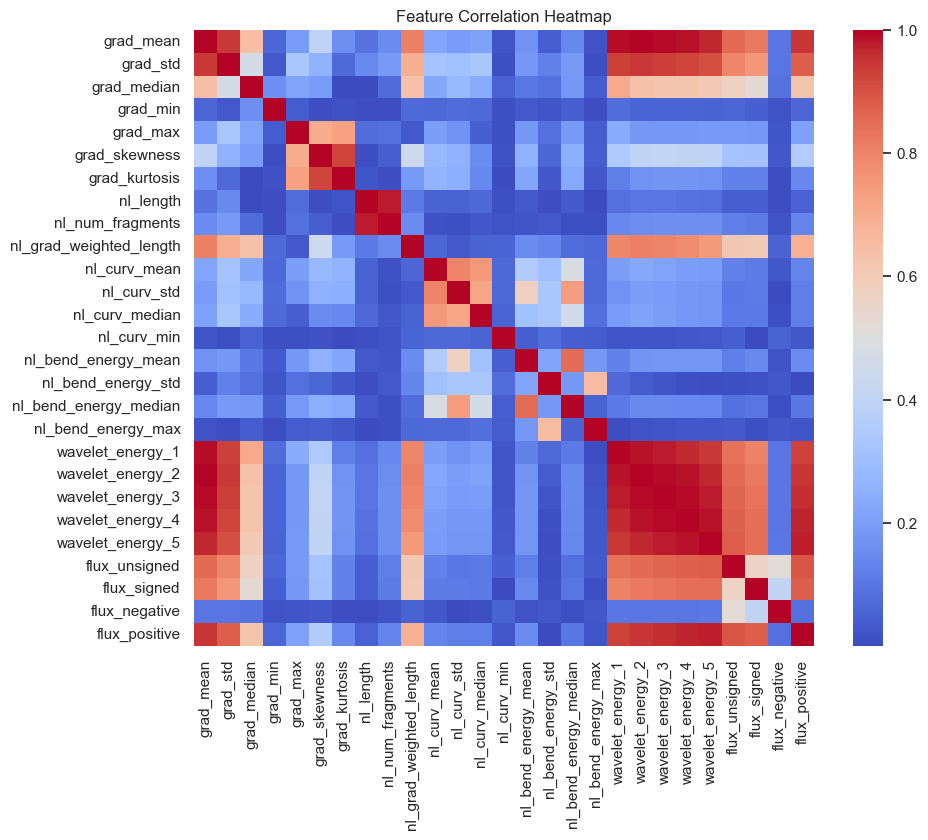

In [433]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()


## Block B – Supervised Feature Ranking


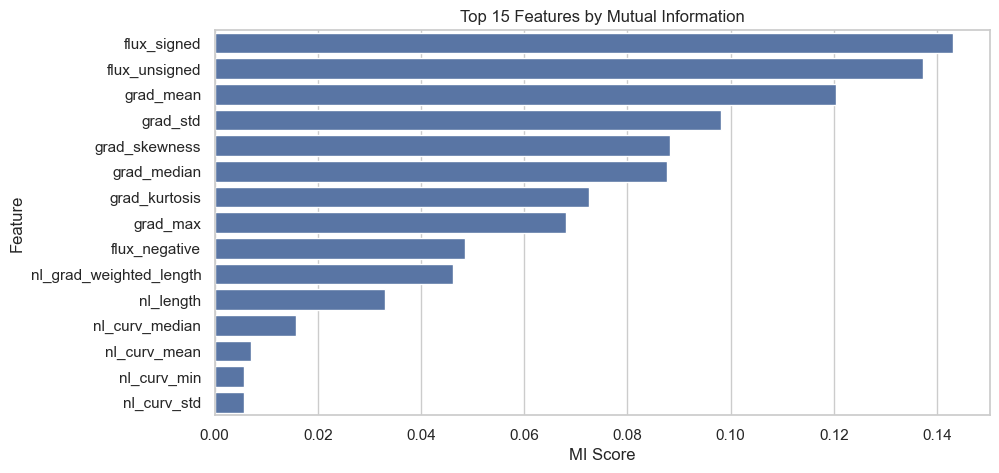

Top features by MI: ['flux_signed', 'flux_unsigned', 'grad_mean', 'grad_std', 'grad_skewness', 'grad_median', 'grad_kurtosis', 'grad_max', 'flux_negative', 'nl_grad_weighted_length', 'nl_length', 'nl_curv_median', 'nl_curv_mean', 'nl_curv_min', 'nl_curv_std', 'nl_bend_energy_max', 'grad_min', 'nl_bend_energy_std', 'nl_bend_energy_mean', 'nl_bend_energy_median']


In [434]:
from sklearn.feature_selection import mutual_info_classif

X = df_filtered[feature_cols_filtered]
y = df_filtered["flare_class4"]

# Encode labels numerically
y_enc = y.map({"0": 0, "C": 1, "M": 2, "X": 3})

mi_scores = mutual_info_classif(X, y_enc, random_state=RANDOM_STATE)
mi_series = pd.Series(mi_scores, index=feature_cols_filtered).sort_values(ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x=mi_series[:15], y=mi_series.index[:15])
plt.title("Top 15 Features by Mutual Information")
plt.xlabel("MI Score")
plt.ylabel("Feature")
plt.show()

# Keep top-k (example: 20)
top_k = 20
selected_features_mi = mi_series.head(top_k).index.tolist()

print("Top features by MI:", selected_features_mi)


## Embedded Feature Selection

c:\Users\admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(


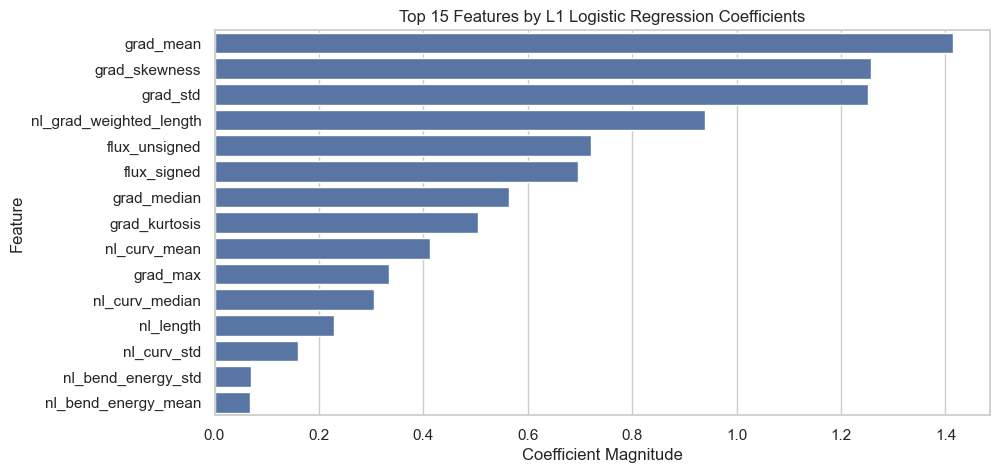

In [435]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

l1_model = LogisticRegression(
    penalty="l1", solver="liblinear", C=0.1, random_state=RANDOM_STATE
)
l1_model.fit(X_scaled, y_enc)

coef = np.abs(l1_model.coef_).mean(axis=0)
coef_series = pd.Series(coef, index=feature_cols_filtered).sort_values(ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x=coef_series[:15], y=coef_series.index[:15])
plt.title("Top 15 Features by L1 Logistic Regression Coefficients")
plt.xlabel("Coefficient Magnitude")
plt.ylabel("Feature")
plt.show()

selected_features_l1 = coef_series.head(top_k).index.tolist()


In [436]:
final_features_union = sorted(set(selected_features_mi) | set(selected_features_l1))
final_features_intersection = sorted(set(selected_features_mi) & set(selected_features_l1))

print("Union count:", len(final_features_union))
print("Intersection count:", len(final_features_intersection))

print("\nUnion:", final_features_union)
print("\nIntersection:", final_features_intersection)


Union count: 20
Intersection count: 20

Union: ['flux_negative', 'flux_signed', 'flux_unsigned', 'grad_kurtosis', 'grad_max', 'grad_mean', 'grad_median', 'grad_min', 'grad_skewness', 'grad_std', 'nl_bend_energy_max', 'nl_bend_energy_mean', 'nl_bend_energy_median', 'nl_bend_energy_std', 'nl_curv_mean', 'nl_curv_median', 'nl_curv_min', 'nl_curv_std', 'nl_grad_weighted_length', 'nl_length']

Intersection: ['flux_negative', 'flux_signed', 'flux_unsigned', 'grad_kurtosis', 'grad_max', 'grad_mean', 'grad_median', 'grad_min', 'grad_skewness', 'grad_std', 'nl_bend_energy_max', 'nl_bend_energy_mean', 'nl_bend_energy_median', 'nl_bend_energy_std', 'nl_curv_mean', 'nl_curv_median', 'nl_curv_min', 'nl_curv_std', 'nl_grad_weighted_length', 'nl_length']


## PCA

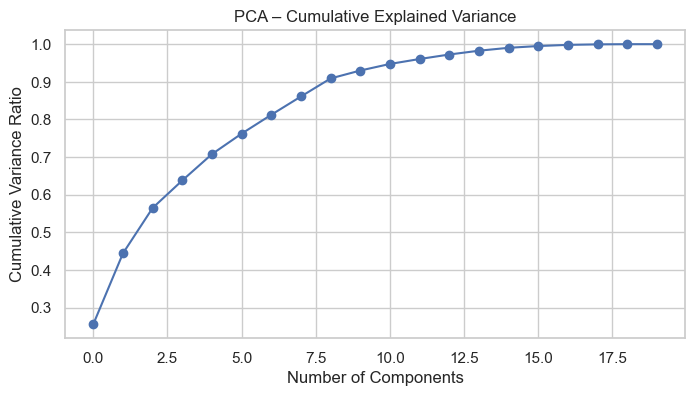

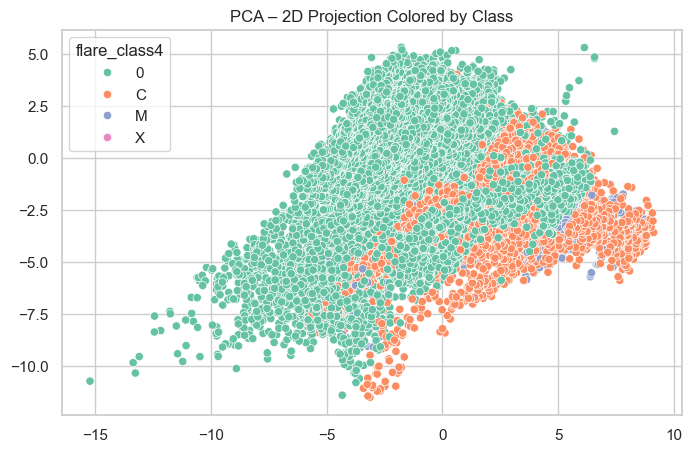

In [437]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Choose your feature set
X = df_filtered[final_features_union]
y = df_filtered["flare_class4"].map({"0":0, "C":1, "M":2, "X":3})

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA model
pca = PCA(n_components=len(X.columns))
X_pca = pca.fit_transform(X_scaled)

# Explained variance plot
plt.figure(figsize=(8,4))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.title("PCA – Cumulative Explained Variance")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Variance Ratio")
plt.grid(True)
plt.show()

# 2D visualization
pca2 = PCA(n_components=2)
X_pca2 = pca2.fit_transform(X_scaled)
sns.scatterplot(x=X_pca2[:,0], y=X_pca2[:,1], hue=df_filtered["flare_class4"], palette="Set2")
plt.title("PCA – 2D Projection Colored by Class")
plt.show()


## t-SNE and UMAP (structure visualization)

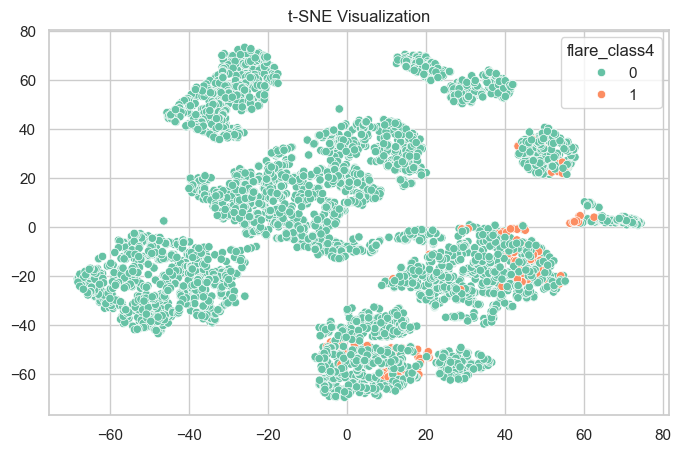

c:\Users\admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


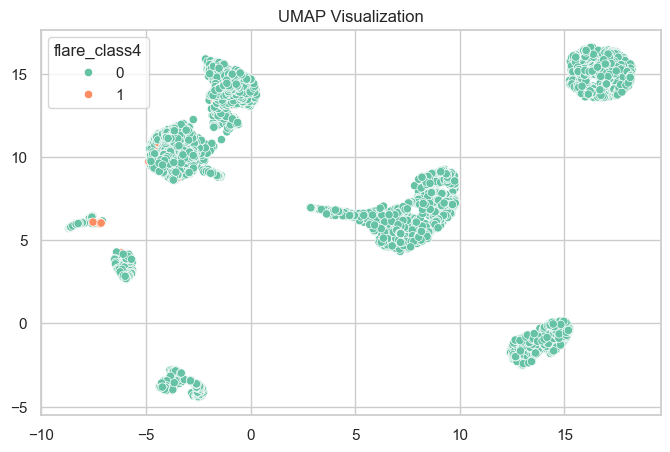

In [438]:
from sklearn.manifold import TSNE
from umap import umap_ as umap # <-- key change

# t-SNE on a sample (for speed)
sample_size = 5000
X_sample = X_scaled[:sample_size]
y_sample = y[:sample_size]

# t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X_sample)

sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=y_sample, palette="Set2")
plt.title("t-SNE Visualization")
plt.show()

# UMAP
reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, random_state=42)
X_umap = reducer.fit_transform(X_sample)

sns.scatterplot(x=X_umap[:, 0], y=X_umap[:, 1], hue=y_sample, palette="Set2")
plt.title("UMAP Visualization")
plt.show()


## L1 LOGISTIC REGRESSION

c:\Users\admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.85      0.98      0.91     22827
           1       0.59      0.28      0.38      5131
           2       1.00      0.00      0.00       749
           3       0.00      0.00      0.00        73

    accuracy                           0.83     28780
   macro avg       0.61      0.32      0.32     28780
weighted avg       0.80      0.83      0.79     28780



c:\Users\admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(ave

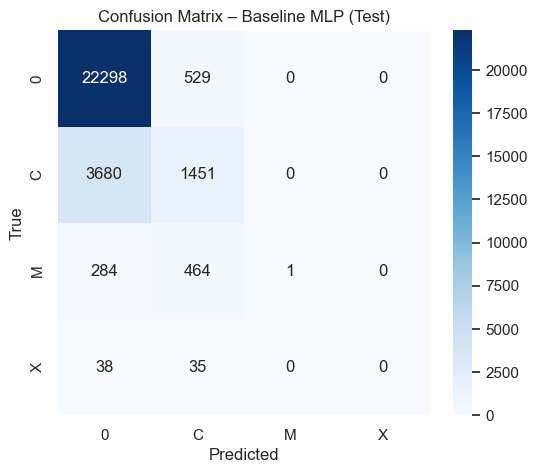

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train_l1, X_test_l1, y_train_l1, y_test_l1 = train_test_split(X, y_enc, test_size=0.3, random_state=1)
l1_model = LogisticRegression(
    penalty="l1", solver="liblinear", C=0.1, random_state=RANDOM_STATE
)
l1_model.fit(X_train_l1, y_train_l1)
y_pred_l1 = l1_model.predict(X_test_l1)
target_names = ["0", "C", "M", "X"]
print(classification_report(y_test_l1, y_pred_l1))

cm = confusion_matrix(y_test_l1, y_pred_l1)
cm_df = pd.DataFrame(cm, index=target_names, columns=target_names)

plt.figure(figsize=(6, 5))
sns.heatmap(cm_df, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix – Baseline MLP (Test)")
plt.show()


## Models

In [439]:
# Cell 4.1.1: Imports for deep models and metrics

import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader, TensorDataset

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    classification_report,
    confusion_matrix
)


In [440]:
# Cell 4.1.2: Feature matrix and encoded labels

# choose the feature set you want to start with
used_features = final_features_union  # or final_features_intersection

X = df_filtered[used_features].values
y = df_filtered["flare_class4"].map({"0": 0, "C": 1, "M": 2, "X": 3}).values

print("X shape:", X.shape)
print("Label value counts:", pd.Series(y).value_counts())


X shape: (95933, 20)
Label value counts: 0    76142
1    16975
2     2578
3      238
Name: count, dtype: int64


In [441]:
# Cell 4.1.3: Train / val / test split (stratified)

X_train_full, X_test, y_train_full, y_test = train_test_split(
    X,
    y,
    test_size=0.15,
    random_state=RANDOM_STATE,
    stratify=y
)

X_train, X_val, y_train, y_val = train_test_split(
    X_train_full,
    y_train_full,
    test_size=0.1765,   # 0.1765 * 0.85 ≈ 0.15 -> total 70/15/15
    random_state=RANDOM_STATE,
    stratify=y_train_full
)

print("Train:", X_train.shape, "Val:", X_val.shape, "Test:", X_test.shape)


Train: (67150, 20) Val: (14393, 20) Test: (14390, 20)


In [442]:
# Cell 4.1.4: Standard scaling

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled   = scaler.transform(X_val)
X_test_scaled  = scaler.transform(X_test)


In [443]:
# Cell 4.1.5: Tensor datasets and dataloaders

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

X_train_t = torch.tensor(X_train_scaled, dtype=torch.float32)
X_val_t   = torch.tensor(X_val_scaled, dtype=torch.float32)
X_test_t  = torch.tensor(X_test_scaled, dtype=torch.float32)

y_train_t = torch.tensor(y_train, dtype=torch.long)
y_val_t   = torch.tensor(y_val, dtype=torch.long)
y_test_t  = torch.tensor(y_test, dtype=torch.long)

train_ds = TensorDataset(X_train_t, y_train_t)
val_ds   = TensorDataset(X_val_t, y_val_t)
test_ds  = TensorDataset(X_test_t, y_test_t)

batch_size = 256

train_loader = DataLoader(train_ds, batch_size=batch_size, shuffle=True)
val_loader   = DataLoader(val_ds, batch_size=batch_size, shuffle=False)
test_loader  = DataLoader(test_ds, batch_size=batch_size, shuffle=False)


Using device: cpu


In [444]:
# Cell 4.2.1: Baseline MLP model

class BaselineMLP(nn.Module):
    def __init__(self, input_dim, hidden_dims=(64, 32), num_classes=4):
        super().__init__()
        layers = []
        prev = input_dim
        for h in hidden_dims:
            layers.append(nn.Linear(prev, h))
            layers.append(nn.ReLU())
            prev = h
        layers.append(nn.Linear(prev, num_classes))
        self.net = nn.Sequential(*layers)

    def forward(self, x):
        return self.net(x)

input_dim = X_train_scaled.shape[1]
num_classes = 4

model = BaselineMLP(input_dim=input_dim, hidden_dims=(64, 32), num_classes=num_classes).to(device)
model


BaselineMLP(
  (net): Sequential(
    (0): Linear(in_features=20, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=32, bias=True)
    (3): ReLU()
    (4): Linear(in_features=32, out_features=4, bias=True)
  )
)

In [445]:
# Cell 4.2.2: Class weights (handle imbalance)

class_counts = pd.Series(y_train).value_counts().sort_index()
print("Train class counts:", class_counts.to_dict())

# inverse frequency
class_weights = 1.0 / class_counts
class_weights = class_weights / class_weights.mean()  # normalize

print("Class weights:", class_weights.to_dict())

class_weights_t = torch.tensor(class_weights.values, dtype=torch.float32).to(device)


Train class counts: {0: 53297, 1: 11882, 2: 1804, 3: 167}
Class weights: {0: 0.011293914777365266, 1: 0.05065912943016635, 2: 0.3336650642401533, 3: 3.6043818915523147}


In [446]:
# Cell 4.2.3: Training and evaluation helper functions

def run_epoch(model, loader, optimizer, criterion, train=True):
    if train:
        model.train()
    else:
        model.eval()

    all_preds = []
    all_targets = []
    running_loss = 0.0

    for xb, yb in loader:
        xb = xb.to(device)
        yb = yb.to(device)

        if train:
            optimizer.zero_grad()

        logits = model(xb)
        loss = criterion(logits, yb)

        if train:
            loss.backward()
            optimizer.step()

        running_loss += loss.item() * xb.size(0)

        preds = torch.argmax(logits, dim=1)
        all_preds.append(preds.detach().cpu().numpy())
        all_targets.append(yb.detach().cpu().numpy())

    all_preds = np.concatenate(all_preds)
    all_targets = np.concatenate(all_targets)

    avg_loss = running_loss / len(loader.dataset)
    acc = accuracy_score(all_targets, all_preds)
    macro_f1 = f1_score(all_targets, all_preds, average="macro")

    return avg_loss, acc, macro_f1, all_targets, all_preds


In [447]:
# Cell 4.3.1: Training loop

torch.manual_seed(RANDOM_STATE)

model = BaselineMLP(input_dim=input_dim, hidden_dims=(64, 32), num_classes=num_classes).to(device)

criterion = nn.CrossEntropyLoss(weight=class_weights_t)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

num_epochs = 20

history = {
    "train_loss": [],
    "val_loss": [],
    "train_macro_f1": [],
    "val_macro_f1": [],
}

best_val_f1 = -np.inf
best_state = None

for epoch in range(1, num_epochs + 1):
    train_loss, train_acc, train_f1, _, _ = run_epoch(
        model, train_loader, optimizer, criterion, train=True
    )
    val_loss, val_acc, val_f1, _, _ = run_epoch(
        model, val_loader, optimizer, criterion, train=False
    )

    history["train_loss"].append(train_loss)
    history["val_loss"].append(val_loss)
    history["train_macro_f1"].append(train_f1)
    history["val_macro_f1"].append(val_f1)

    if val_f1 > best_val_f1:
        best_val_f1 = val_f1
        best_state = model.state_dict()

    print(
        f"Epoch {epoch:02d} | "
        f"Train loss {train_loss:.4f}, F1 {train_f1:.4f} | "
        f"Val loss {val_loss:.4f}, F1 {val_f1:.4f}"
    )

# load best model
model.load_state_dict(best_state)
print("Best validation macro F1:", best_val_f1)


Epoch 01 | Train loss 1.0793, F1 0.3741 | Val loss 0.8639, F1 0.3954
Epoch 02 | Train loss 0.7468, F1 0.4171 | Val loss 0.6660, F1 0.4218
Epoch 03 | Train loss 0.6305, F1 0.4388 | Val loss 0.5952, F1 0.4475
Epoch 04 | Train loss 0.5766, F1 0.4620 | Val loss 0.5537, F1 0.4570
Epoch 05 | Train loss 0.5513, F1 0.4820 | Val loss 0.5241, F1 0.4870
Epoch 06 | Train loss 0.5109, F1 0.5053 | Val loss 0.5061, F1 0.5592
Epoch 07 | Train loss 0.4844, F1 0.5288 | Val loss 0.4833, F1 0.5153
Epoch 08 | Train loss 0.4700, F1 0.5414 | Val loss 0.4679, F1 0.5589
Epoch 09 | Train loss 0.4470, F1 0.5657 | Val loss 0.4452, F1 0.5560
Epoch 10 | Train loss 0.4362, F1 0.5781 | Val loss 0.4584, F1 0.5619
Epoch 11 | Train loss 0.4189, F1 0.5939 | Val loss 0.4212, F1 0.6159
Epoch 12 | Train loss 0.4027, F1 0.6084 | Val loss 0.4033, F1 0.5968
Epoch 13 | Train loss 0.3850, F1 0.6212 | Val loss 0.3992, F1 0.6090
Epoch 14 | Train loss 0.3688, F1 0.6367 | Val loss 0.3768, F1 0.6169
Epoch 15 | Train loss 0.3614, F1 0

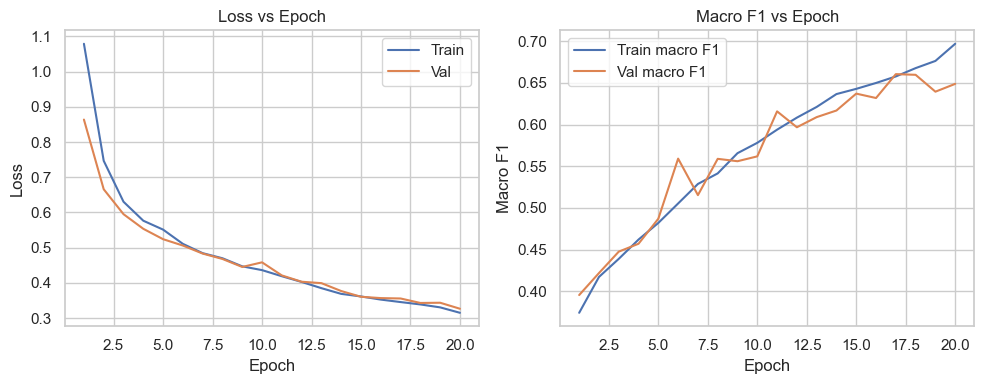

In [448]:
# Cell 4.3.2: Plot training curves

epochs = range(1, num_epochs + 1)

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, history["train_loss"], label="Train")
plt.plot(epochs, history["val_loss"], label="Val")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss vs Epoch")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, history["train_macro_f1"], label="Train macro F1")
plt.plot(epochs, history["val_macro_f1"], label="Val macro F1")
plt.xlabel("Epoch")
plt.ylabel("Macro F1")
plt.title("Macro F1 vs Epoch")
plt.legend()

plt.tight_layout()
plt.show()


Test loss: 0.3284
Test accuracy: 0.8074
Test macro F1: 0.6583

Classification report (test):
              precision    recall  f1-score   support

           0       0.96      0.82      0.88     11421
           C       0.50      0.73      0.59      2546
           M       0.44      0.96      0.60       387
           X       0.39      0.97      0.56        36

    accuracy                           0.81     14390
   macro avg       0.57      0.87      0.66     14390
weighted avg       0.86      0.81      0.82     14390



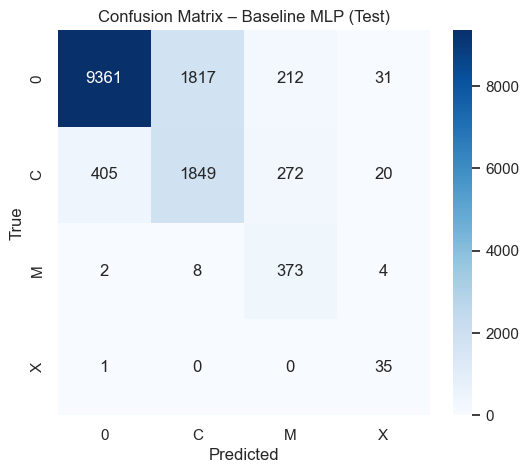

In [449]:
# Cell 4.3.3: Test set performance and confusion matrix

test_loss, test_acc, test_f1, y_true_test, y_pred_test = run_epoch(
    model, test_loader, optimizer=None, criterion=criterion, train=False
)

print(f"Test loss: {test_loss:.4f}")
print(f"Test accuracy: {test_acc:.4f}")
print(f"Test macro F1: {test_f1:.4f}")

print("\nClassification report (test):")
target_names = ["0", "C", "M", "X"]
print(classification_report(y_true_test, y_pred_test, target_names=target_names))

cm = confusion_matrix(y_true_test, y_pred_test)
cm_df = pd.DataFrame(cm, index=target_names, columns=target_names)

plt.figure(figsize=(6, 5))
sns.heatmap(cm_df, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix – Baseline MLP (Test)")
plt.show()


## DEEPER MLP

In [450]:
# Cell 4.4.1: Deeper MLP with BatchNorm + Dropout

class DeepMLP(nn.Module):
    def __init__(
        self,
        input_dim,
        hidden_dims=(256, 128, 64, 32),
        num_classes=4,
        dropout_p=0.3
    ):
        super().__init__()
        layers = []
        prev = input_dim

        for h in hidden_dims:
            layers.append(nn.Linear(prev, h))
            layers.append(nn.BatchNorm1d(h))
            layers.append(nn.ReLU())
            layers.append(nn.Dropout(dropout_p))
            prev = h

        layers.append(nn.Linear(prev, num_classes))
        self.net = nn.Sequential(*layers)

    def forward(self, x):
        return self.net(x)
    
    def forward_features(self, x):
     for layer in self.hidden_layers:
        x = self.dropout(self.activation(layer(x)))
     return x



In [451]:
# Cell 4.4.2: Generic train/eval wrapper for any model

def train_model(
    model,
    train_loader,
    val_loader,
    class_weights_t,
    num_epochs=40,
    lr=1e-3,
    weight_decay=0.0,
    verbose=True
):
    model = model.to(device)
    criterion = nn.CrossEntropyLoss(weight=class_weights_t)
    optimizer = torch.optim.Adam(
        model.parameters(), lr=lr, weight_decay=weight_decay
    )

    history = {
        "train_loss": [],
        "val_loss": [],
        "train_macro_f1": [],
        "val_macro_f1": [],
    }

    best_val_f1 = -np.inf
    best_state = None

    for epoch in range(1, num_epochs + 1):
        train_loss, train_acc, train_f1, _, _ = run_epoch(
            model, train_loader, optimizer, criterion, train=True
        )
        val_loss, val_acc, val_f1, _, _ = run_epoch(
            model, val_loader, optimizer, criterion, train=False
        )

        history["train_loss"].append(train_loss)
        history["val_loss"].append(val_loss)
        history["train_macro_f1"].append(train_f1)
        history["val_macro_f1"].append(val_f1)

        if val_f1 > best_val_f1:
            best_val_f1 = val_f1
            best_state = model.state_dict()

        if verbose:
            print(
                f"Epoch {epoch:02d} | "
                f"Train loss {train_loss:.4f}, F1 {train_f1:.4f} | "
                f"Val loss {val_loss:.4f}, F1 {val_f1:.4f}"
            )

    model.load_state_dict(best_state)
    return model, history, best_val_f1


In [452]:
# Cell 4.4.3: Train deeper MLP

torch.manual_seed(RANDOM_STATE)

deep_model = DeepMLP(
    input_dim=input_dim,
    hidden_dims=(256, 128, 64, 32),
    num_classes=num_classes,
    dropout_p=0.3
)

deep_model, deep_history, deep_best_val_f1 = train_model(
    deep_model,
    train_loader,
    val_loader,
    class_weights_t,
    num_epochs=10,
    lr=1e-2,
    weight_decay=1e-4,   # small L2 regularization
    verbose=True
)

print("Best validation macro F1 (DeepMLP):", deep_best_val_f1)


Epoch 01 | Train loss 1.0268, F1 0.3219 | Val loss 0.7723, F1 0.3693
Epoch 02 | Train loss 0.8516, F1 0.3629 | Val loss 0.7594, F1 0.3728
Epoch 03 | Train loss 0.8030, F1 0.3686 | Val loss 0.7006, F1 0.3969
Epoch 04 | Train loss 0.7294, F1 0.3846 | Val loss 0.5975, F1 0.4406
Epoch 05 | Train loss 0.7083, F1 0.3912 | Val loss 0.5740, F1 0.4385
Epoch 06 | Train loss 0.6971, F1 0.4028 | Val loss 0.5584, F1 0.4229
Epoch 07 | Train loss 0.6761, F1 0.4040 | Val loss 0.5432, F1 0.4200
Epoch 08 | Train loss 0.6494, F1 0.4089 | Val loss 0.5264, F1 0.4348
Epoch 09 | Train loss 0.6626, F1 0.4111 | Val loss 0.5503, F1 0.4367
Epoch 10 | Train loss 0.6033, F1 0.4399 | Val loss 0.4911, F1 0.4480
Best validation macro F1 (DeepMLP): 0.4479513093096984


DeepMLP – Test loss: 0.4886
DeepMLP – Test accuracy: 0.6843
DeepMLP – Test macro F1: 0.4503

DeepMLP – Classification report (test):
              precision    recall  f1-score   support

           0       0.96      0.70      0.81     11421
           C       0.36      0.57      0.44      2546
           M       0.23      0.95      0.37       387
           X       0.10      1.00      0.18        36

    accuracy                           0.68     14390
   macro avg       0.41      0.81      0.45     14390
weighted avg       0.83      0.68      0.73     14390



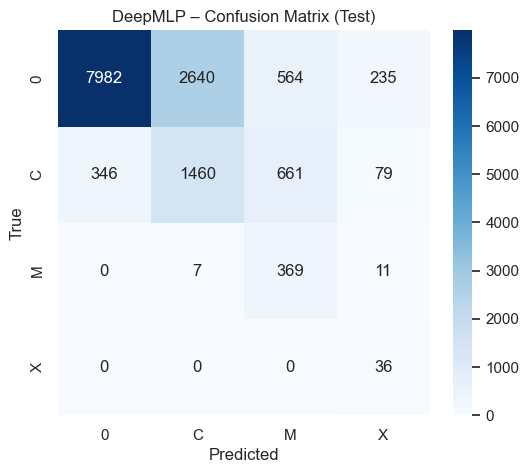

In [453]:
# Cell 4.4.5: Test performance for DeepMLP

criterion = nn.CrossEntropyLoss(weight=class_weights_t)

test_loss, test_acc, test_f1, y_true_test, y_pred_test = run_epoch(
    deep_model, test_loader, optimizer=None, criterion=criterion, train=False
)

print(f"DeepMLP – Test loss: {test_loss:.4f}")
print(f"DeepMLP – Test accuracy: {test_acc:.4f}")
print(f"DeepMLP – Test macro F1: {test_f1:.4f}")

target_names = ["0", "C", "M", "X"]
print("\nDeepMLP – Classification report (test):")
print(classification_report(y_true_test, y_pred_test, target_names=target_names))

cm = confusion_matrix(y_true_test, y_pred_test)
cm_df = pd.DataFrame(cm, index=target_names, columns=target_names)

plt.figure(figsize=(6, 5))
sns.heatmap(cm_df, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("DeepMLP – Confusion Matrix (Test)")
plt.show()


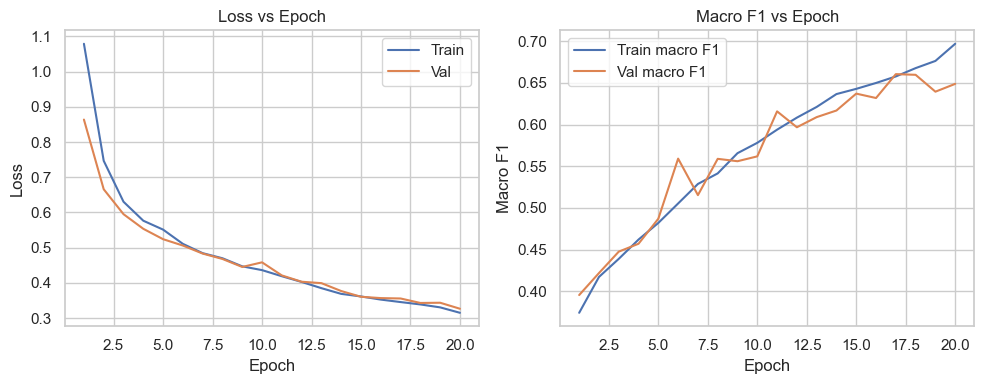

In [454]:
# Cell 4.3.2: Plot training curves

epochs = range(1, num_epochs + 1)

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, history["train_loss"], label="Train")
plt.plot(epochs, history["val_loss"], label="Val")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss vs Epoch")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, history["train_macro_f1"], label="Train macro F1")
plt.plot(epochs, history["val_macro_f1"], label="Val macro F1")
plt.xlabel("Epoch")
plt.ylabel("Macro F1")
plt.title("Macro F1 vs Epoch")
plt.legend()

plt.tight_layout()
plt.show()


## APPLY CONTROLLED SMOTE

Original train class counts: {0: 53297, 1: 11882, 2: 1804, 3: 167}


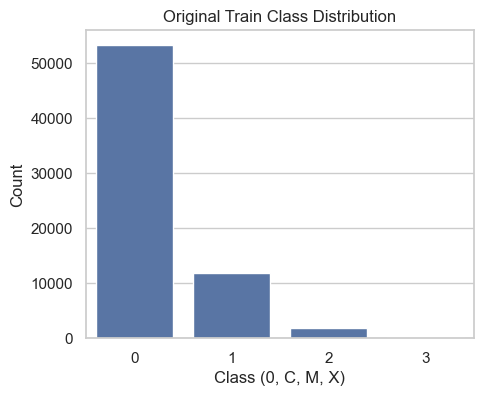

In [455]:
from imblearn.over_sampling import SMOTE
# Cell 5.2.1: Original train class distribution

train_counts = pd.Series(y_train).value_counts().sort_index()
print("Original train class counts:", train_counts.to_dict())

plt.figure(figsize=(5,4))
sns.barplot(x=train_counts.index, y=train_counts.values)
plt.title("Original Train Class Distribution")
plt.xlabel("Class (0, C, M, X)")
plt.ylabel("Count")
plt.show()


Custom sampling strategy: {1: 26648, 2: 26648, 3: 26648}
Custom SMOTE train class counts: {0: 53297, 1: 26648, 2: 26648, 3: 26648}


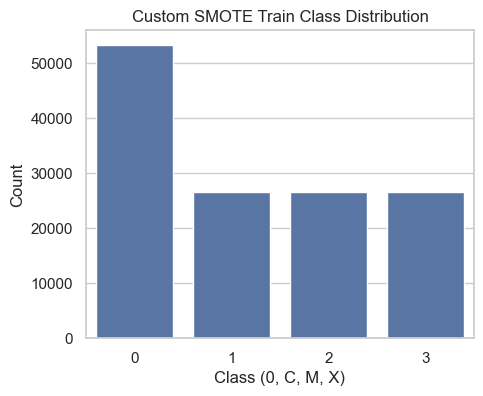

In [456]:
# Cell 5.3.2: Custom moderate SMOTE (optional)

target_perc = 0.5  # aim for each minority to be ~50% of majority

majority_n = train_counts.iloc[0]     # class 0 count
target_n = int(majority_n * target_perc)

sampling_strategy = {
    1: max(train_counts.get(1, 0), target_n),  # C
    2: max(train_counts.get(2, 0), target_n),  # M
    3: max(train_counts.get(3, 0), target_n),  # X
}

print("Custom sampling strategy:", sampling_strategy)

smote_custom = SMOTE(
    sampling_strategy=sampling_strategy,
    random_state=RANDOM_STATE,
    k_neighbors=5
)

X_train_smote, y_train_smote = smote_custom.fit_resample(X_train_scaled, y_train)

smote_counts = pd.Series(y_train_smote).value_counts().sort_index()
print("Custom SMOTE train class counts:", smote_counts.to_dict())

plt.figure(figsize=(5,4))
sns.barplot(x=smote_counts.index, y=smote_counts.values)
plt.title("Custom SMOTE Train Class Distribution")
plt.xlabel("Class (0, C, M, X)")
plt.ylabel("Count")
plt.show()


In [457]:
# Cell 5.4.1: New train loader with SMOTE data

X_train_smote_t = torch.tensor(X_train_smote, dtype=torch.float32)
y_train_smote_t = torch.tensor(y_train_smote, dtype=torch.long)

train_ds_smote = TensorDataset(X_train_smote_t, y_train_smote_t)
train_loader_smote = DataLoader(train_ds_smote, batch_size=batch_size, shuffle=True)

print("Original train size:", len(train_ds))
print("SMOTE train size:", len(train_ds_smote))


Original train size: 67150
SMOTE train size: 133241


In [458]:
# Cell 5.5.1: Uniform class weights for SMOTE experiment

# all ones -> no weighting
class_weights_smote_t = torch.ones(num_classes, dtype=torch.float32).to(device)
class_weights_smote_t


tensor([1., 1., 1., 1.])

In [459]:
# Cell 5.5.2: Train DeepMLP on SMOTE-augmented data

torch.manual_seed(RANDOM_STATE)

deep_model_smote = DeepMLP(
    input_dim=input_dim,
    hidden_dims=(256, 128, 64, 32),
    num_classes=num_classes,
    dropout_p=0.3
)

deep_model_smote, deep_history_smote, best_val_f1_smote = train_model(
    deep_model_smote,
    train_loader_smote,   # <--- SMOTE loader
    val_loader,           # same validation
    class_weights_smote_t,
    num_epochs=10,
    lr=1e-3,
    weight_decay=1e-4,
    verbose=True
)

print("Best validation macro F1 (DeepMLP + SMOTE):", best_val_f1_smote)


Epoch 01 | Train loss 0.6448, F1 0.7088 | Val loss 0.4475, F1 0.5779
Epoch 02 | Train loss 0.4350, F1 0.8095 | Val loss 0.4120, F1 0.6320
Epoch 03 | Train loss 0.3754, F1 0.8384 | Val loss 0.3736, F1 0.6696
Epoch 04 | Train loss 0.3363, F1 0.8585 | Val loss 0.3261, F1 0.7239
Epoch 05 | Train loss 0.3097, F1 0.8704 | Val loss 0.3070, F1 0.7124
Epoch 06 | Train loss 0.2906, F1 0.8804 | Val loss 0.2909, F1 0.7595
Epoch 07 | Train loss 0.2757, F1 0.8873 | Val loss 0.2548, F1 0.7988
Epoch 08 | Train loss 0.2596, F1 0.8952 | Val loss 0.2564, F1 0.7914
Epoch 09 | Train loss 0.2493, F1 0.8989 | Val loss 0.2410, F1 0.7984
Epoch 10 | Train loss 0.2440, F1 0.9026 | Val loss 0.2297, F1 0.7910
Best validation macro F1 (DeepMLP + SMOTE): 0.7988185063785764


DeepMLP + SMOTE – Test loss: 0.2327
DeepMLP + SMOTE – Test accuracy: 0.8984
DeepMLP + SMOTE – Test macro F1: 0.8136

DeepMLP + SMOTE – Classification report (test):
              precision    recall  f1-score   support

           0       0.97      0.91      0.94     11421
           C       0.70      0.81      0.75      2546
           M       0.65      1.00      0.79       387
           X       0.63      1.00      0.77        36

    accuracy                           0.90     14390
   macro avg       0.74      0.93      0.81     14390
weighted avg       0.91      0.90      0.90     14390



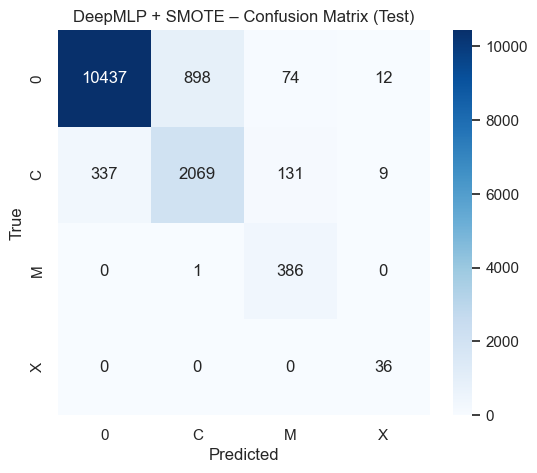

In [460]:
# Cell 5.6.1: Test performance – DeepMLP + SMOTE

criterion_smote = nn.CrossEntropyLoss(weight=class_weights_smote_t)

test_loss_smote, test_acc_smote, test_f1_smote, y_true_test_sm, y_pred_test_sm = run_epoch(
    deep_model_smote, test_loader, optimizer=None, criterion=criterion_smote, train=False
)

print(f"DeepMLP + SMOTE – Test loss: {test_loss_smote:.4f}")
print(f"DeepMLP + SMOTE – Test accuracy: {test_acc_smote:.4f}")
print(f"DeepMLP + SMOTE – Test macro F1: {test_f1_smote:.4f}")

print("\nDeepMLP + SMOTE – Classification report (test):")
print(classification_report(y_true_test_sm, y_pred_test_sm, target_names=["0", "C", "M", "X"]))

cm_sm = confusion_matrix(y_true_test_sm, y_pred_test_sm)
cm_sm_df = pd.DataFrame(cm_sm, index=["0", "C", "M", "X"], columns=["0", "C", "M", "X"])

plt.figure(figsize=(6,5))
sns.heatmap(cm_sm_df, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("DeepMLP + SMOTE – Confusion Matrix (Test)")
plt.show()


## TRYING FOCAL LOSS

In [461]:
# 1. Imports and global config
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score

import torch
from torch import nn
from torch.utils.data import TensorDataset, DataLoader
import torch.nn.functional as F

# Plot style
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8,5)
RANDOM_STATE = 42
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device:", device)


Device: cpu


In [462]:
# 2. Load dataset
DATA_PATH =r"C:\Users\admin\Desktop\Dataset\Test_Data_by_AR.csv"  # update path if needed
df = pd.read_csv(DATA_PATH)

print("Shape:", df.shape)
print("Columns:", len(df.columns))
display(df.head())


Shape: (94757, 32)
Columns: 32


,grad_mean,grad_std,grad_median,grad_min,grad_max,grad_skewness,grad_kurtosis,nl_length,nl_num_fragments,nl_grad_weighted_length,...,wavelet_energy_3,wavelet_energy_4,wavelet_energy_5,flux_unsigned,flux_signed,flux_negative,flux_positive,class_label,flare_strength,image_path
0,0.052300,0.076170,0.056662,1.950000e-15,0.082432,0.122045,0.017828,0.000807,0.000827,0.524773,...,0.036459,0.021087,0.017396,0.021671,0.978620,0.487610,0.010730,0,0,1066_hmi.M_720s.20100503_000000_TAI.1.magnetog...
1,0.052639,0.077402,0.056457,2.773501e-01,0.072828,0.117580,0.016321,0.001790,0.001379,0.538176,...,0.036025,0.022229,0.018467,0.021725,0.978268,0.487293,0.010932,0,0,1066_hmi.M_720s.20100503_001200_TAI.1.magnetog...
2,0.053069,0.078590,0.056627,0.000000e+00,0.064745,0.115518,0.015533,0.002668,0.002344,0.533320,...,0.036392,0.023482,0.018315,0.022115,0.978136,0.487628,0.011212,0,0,1066_hmi.M_720s.20100503_002400_TAI.1.magnetog...
3,0.053571,0.078275,0.057007,1.870000e-15,0.060889,0.113588,0.014965,0.001334,0.001517,0.533692,...,0.038048,0.023829,0.019340,0.022440,0.977694,0.487547,0.011608,0,0,1066_hmi.M_720s.20100503_003600_TAI.1.magnetog...
4,0.053578,0.079388,0.056328,7.580000e-16,0.064512,0.115857,0.015625,0.001369,0.001792,0.534063,...,0.038995,0.024308,0.019515,0.022829,0.977683,0.488014,0.011828,0,0,1066_hmi.M_720s.20100503_004800_TAI.1.magnetog...


flare_class4
0    73215
C    18230
M     2961
X      351
Name: count, dtype: int64


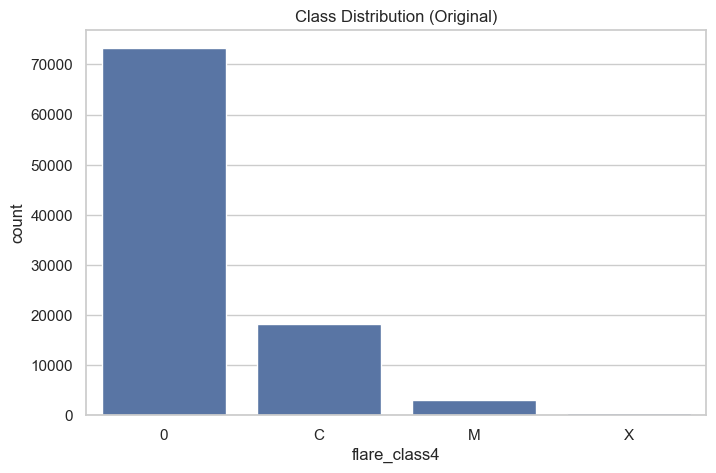

In [463]:
# 3. Map flare_strength to 4 coarse classes
def map_flare_class(fs):
    if fs == 0 or str(fs) == "0":
        return "0"
    s = str(fs)
    if s.startswith("C"): return "C"
    if s.startswith("M"): return "M"
    if s.startswith("X"): return "X"
    return "other"

df["flare_class4"] = df["flare_strength"].apply(map_flare_class)
print(df["flare_class4"].value_counts())

sns.countplot(x="flare_class4", data=df, order=["0","C","M","X"])
plt.title("Class Distribution (Original)")
plt.show()


In [464]:
# 4. Separate features and labels
non_features = ["flare_strength", "flare_class4", "image_path", "class_label"]
feature_cols = [c for c in df.columns if c not in non_features]

X = df[feature_cols].fillna(0).values
y = df["flare_class4"].map({"0":0, "C":1, "M":2, "X":3}).values

# Stratified splits
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=RANDOM_STATE)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=RANDOM_STATE)

# Scale
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val   = scaler.transform(X_val)
X_test  = scaler.transform(X_test)

print("Train/Val/Test:", X_train.shape, X_val.shape, X_test.shape)


Train/Val/Test: (66329, 29) (14214, 29) (14214, 29)


In [465]:
# 5. Tensor datasets and loaders
batch_size = 256

to_tensor = lambda x: torch.tensor(x, dtype=torch.float32)
to_long   = lambda y: torch.tensor(y, dtype=torch.long)

train_ds = TensorDataset(to_tensor(X_train), to_long(y_train))
val_ds   = TensorDataset(to_tensor(X_val), to_long(y_val))
test_ds  = TensorDataset(to_tensor(X_test), to_long(y_test))

train_loader = DataLoader(train_ds, batch_size=batch_size, shuffle=True)
val_loader   = DataLoader(val_ds, batch_size=batch_size)
test_loader  = DataLoader(test_ds, batch_size=batch_size)


In [466]:
# 5. Tensor datasets and loaders
batch_size = 256

to_tensor = lambda x: torch.tensor(x, dtype=torch.float32)
to_long   = lambda y: torch.tensor(y, dtype=torch.long)

train_ds = TensorDataset(to_tensor(X_train), to_long(y_train))
val_ds   = TensorDataset(to_tensor(X_val), to_long(y_val))
test_ds  = TensorDataset(to_tensor(X_test), to_long(y_test))

train_loader = DataLoader(train_ds, batch_size=batch_size, shuffle=True)
val_loader   = DataLoader(val_ds, batch_size=batch_size)
test_loader  = DataLoader(test_ds, batch_size=batch_size)


In [467]:
# 6. Deep MLP model
class DeepMLP(nn.Module):
    def __init__(self, input_dim, hidden_dims=(256,128,64,32), num_classes=4, dropout_p=0.3):
        super().__init__()
        layers = []
        prev = input_dim
        for h in hidden_dims:
            layers += [nn.Linear(prev, h), nn.BatchNorm1d(h), nn.ReLU(), nn.Dropout(dropout_p)]
            prev = h
        layers.append(nn.Linear(prev, num_classes))
        self.net = nn.Sequential(*layers)
    def forward(self, x):
        return self.net(x)
    def forward_features(self, x):
        for layer in self.hidden_layers:
            x = self.dropout(self.activation(layer(x)))
        return x



In [468]:
# 7. Focal Loss
class FocalLoss(nn.Module):
    def __init__(self, alpha=None, gamma=2.0, reduction="mean"):
        super().__init__()
        self.alpha = alpha
        self.gamma = gamma
        self.reduction = reduction

    def forward(self, inputs, targets):
        log_probs = F.log_softmax(inputs, dim=1)
        probs = torch.exp(log_probs)
        targets_one_hot = F.one_hot(targets, num_classes=inputs.shape[1]).to(inputs.device)

        pt = (probs * targets_one_hot).sum(1)
        log_pt = (log_probs * targets_one_hot).sum(1)

        if self.alpha is not None:
            at = self.alpha.gather(0, targets)
            loss = -at * (1 - pt)**self.gamma * log_pt
        else:
            loss = -(1 - pt)**self.gamma * log_pt

        if self.reduction == "mean":
            return loss.mean()
        elif self.reduction == "sum":
            return loss.sum()
        else:
            return loss


In [469]:
# 8. Compute alpha (inverse-frequency weights)
class_counts = pd.Series(y_train).value_counts().sort_index()
alpha = 1.0 / class_counts
alpha = alpha / alpha.sum()
alpha_t = torch.tensor(alpha.values, dtype=torch.float32).to(device)
print("Alpha (class weights):", alpha_t)


Alpha (class weights): tensor([0.0042, 0.0169, 0.1039, 0.8750])


In [470]:
# 9. Helper function
def run_epoch(model, loader, optimizer, criterion, train=True):
    if train:
        model.train()
    else:
        model.eval()
    total_loss, preds, targets = 0, [], []

    for xb, yb in loader:
        xb, yb = xb.to(device), yb.to(device)
        if train:
            optimizer.zero_grad()
        logits = model(xb)
        loss = criterion(logits, yb)
        if train:
            loss.backward()
            optimizer.step()
        total_loss += loss.item() * xb.size(0)
        preds.extend(torch.argmax(logits, 1).cpu().numpy())
        targets.extend(yb.cpu().numpy())

    avg_loss = total_loss / len(loader.dataset)
    acc = accuracy_score(targets, preds)
    macro_f1 = f1_score(targets, preds, average="macro")
    return avg_loss, acc, macro_f1, targets, preds


In [471]:
# 10. Train model
input_dim = X_train.shape[1]
num_classes = 4

model = DeepMLP(input_dim=input_dim, num_classes=num_classes).to(device)
criterion = FocalLoss(alpha=alpha_t, gamma=2.0)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-4)

num_epochs = 25
history = {"train_f1":[], "val_f1":[], "train_loss":[], "val_loss":[]}
best_val_f1, best_state = -np.inf, None

for epoch in range(1, num_epochs+1):
    train_loss, train_acc, train_f1, _, _ = run_epoch(model, train_loader, optimizer, criterion, True)
    val_loss, val_acc, val_f1, _, _ = run_epoch(model, val_loader, optimizer, criterion, False)
    history["train_loss"].append(train_loss)
    history["val_loss"].append(val_loss)
    history["train_f1"].append(train_f1)
    history["val_f1"].append(val_f1)
    if val_f1 > best_val_f1:
        best_val_f1, best_state = val_f1, model.state_dict()
    print(f"Epoch {epoch:02d} | Train F1={train_f1:.3f} | Val F1={val_f1:.3f}")
model.load_state_dict(best_state)
print("Best Val F1:", best_val_f1)


Epoch 01 | Train F1=0.293 | Val F1=0.438
Epoch 02 | Train F1=0.382 | Val F1=0.464
Epoch 03 | Train F1=0.401 | Val F1=0.496
Epoch 04 | Train F1=0.403 | Val F1=0.451
Epoch 05 | Train F1=0.430 | Val F1=0.395
Epoch 06 | Train F1=0.419 | Val F1=0.421
Epoch 07 | Train F1=0.440 | Val F1=0.504
Epoch 08 | Train F1=0.432 | Val F1=0.483
Epoch 09 | Train F1=0.442 | Val F1=0.477
Epoch 10 | Train F1=0.459 | Val F1=0.585
Epoch 11 | Train F1=0.434 | Val F1=0.495
Epoch 12 | Train F1=0.447 | Val F1=0.484
Epoch 13 | Train F1=0.451 | Val F1=0.536
Epoch 14 | Train F1=0.467 | Val F1=0.527
Epoch 15 | Train F1=0.470 | Val F1=0.510
Epoch 16 | Train F1=0.471 | Val F1=0.493
Epoch 17 | Train F1=0.474 | Val F1=0.526
Epoch 18 | Train F1=0.484 | Val F1=0.603
Epoch 19 | Train F1=0.486 | Val F1=0.577
Epoch 20 | Train F1=0.496 | Val F1=0.597
Epoch 21 | Train F1=0.479 | Val F1=0.623
Epoch 22 | Train F1=0.460 | Val F1=0.566
Epoch 23 | Train F1=0.486 | Val F1=0.495
Epoch 24 | Train F1=0.464 | Val F1=0.523
Epoch 25 | Train

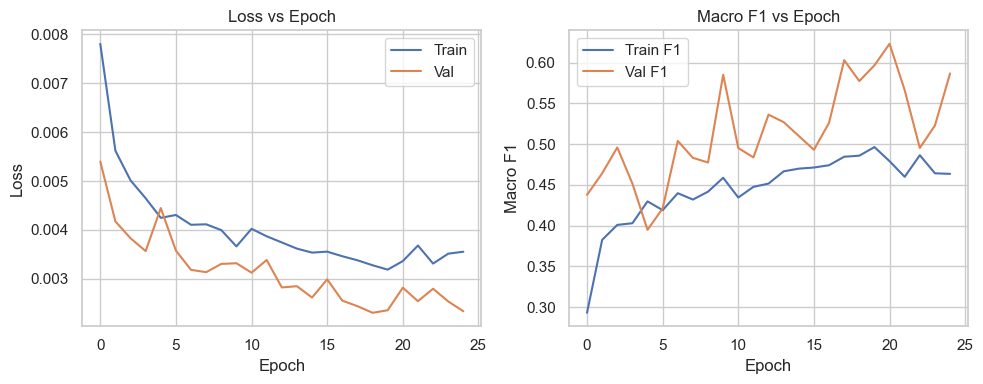

In [472]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history["train_loss"], label="Train")
plt.plot(history["val_loss"], label="Val")
plt.title("Loss vs Epoch")
plt.xlabel("Epoch"); plt.ylabel("Loss"); plt.legend()

plt.subplot(1,2,2)
plt.plot(history["train_f1"], label="Train F1")
plt.plot(history["val_f1"], label="Val F1")
plt.title("Macro F1 vs Epoch")
plt.xlabel("Epoch"); plt.ylabel("Macro F1"); plt.legend()

plt.tight_layout()
plt.show()


Test Accuracy: 0.7830
Test Macro F1: 0.5860

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.83      0.87     10983
           C       0.50      0.56      0.53      2734
           M       0.40      0.85      0.54       445
           X       0.25      0.98      0.40        52

    accuracy                           0.78     14214
   macro avg       0.52      0.81      0.59     14214
weighted avg       0.82      0.78      0.80     14214



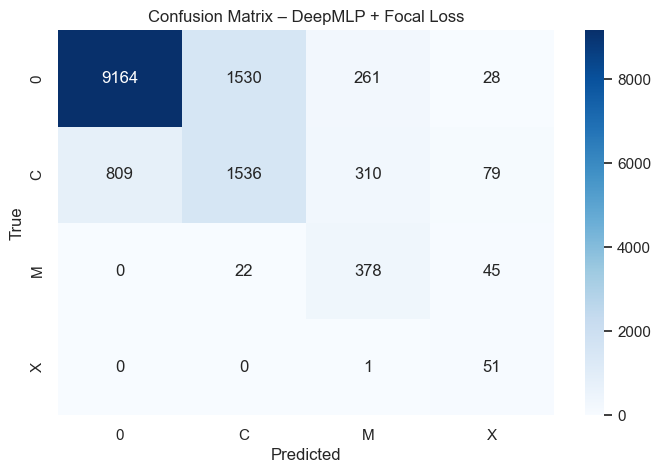

In [473]:
test_loss, test_acc, test_f1, y_true, y_pred = run_epoch(
    model, test_loader, optimizer=None, criterion=criterion, train=False)

print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test Macro F1: {test_f1:.4f}")

print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=["0","C","M","X"]))

cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["0","C","M","X"], yticklabels=["0","C","M","X"])
plt.title("Confusion Matrix – DeepMLP + Focal Loss")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


## FULL SMOTE + FOCAL

In [474]:
# 1. SMOTE on training data (on already scaled X_train)

# If not installed:
# !pip install imbalanced-learn

from imblearn.over_sampling import SMOTE

print("Original train class counts:", pd.Series(y_train).value_counts().sort_index().to_dict())

smote = SMOTE(
    sampling_strategy="not majority",  # oversample C, M, X
    random_state=RANDOM_STATE,
    k_neighbors=5
)

X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

print("After SMOTE train class counts:", pd.Series(y_train_sm).value_counts().sort_index().to_dict())


Original train class counts: {0: 51250, 1: 12761, 2: 2072, 3: 246}
After SMOTE train class counts: {0: 51250, 1: 51250, 2: 51250, 3: 51250}


In [475]:
# 2A. Train loader with SMOTE data, no alpha (simpler first test)

X_train_sm_t = torch.tensor(X_train_sm, dtype=torch.float32)
y_train_sm_t = torch.tensor(y_train_sm, dtype=torch.long)

train_ds_sm = TensorDataset(X_train_sm_t, y_train_sm_t)
train_loader_sm = DataLoader(train_ds_sm, batch_size=batch_size, shuffle=True)

# focal loss without alpha (alpha=None)
class FocalLoss(nn.Module):
    def __init__(self, alpha=None, gamma=1.5, reduction="mean"):
        super().__init__()
        self.alpha = alpha
        self.gamma = gamma
        self.reduction = reduction

    def forward(self, inputs, targets):
        log_probs = F.log_softmax(inputs, dim=1)
        probs = torch.exp(log_probs)
        targets_one_hot = F.one_hot(targets, num_classes=inputs.shape[1]).to(inputs.device)

        pt = (probs * targets_one_hot).sum(1)
        log_pt = (log_probs * targets_one_hot).sum(1)

        if self.alpha is not None:
            at = self.alpha.gather(0, targets)
            loss = -at * (1 - pt)**self.gamma * log_pt
        else:
            loss = -(1 - pt)**self.gamma * log_pt

        if self.reduction == "mean":
            return loss.mean()
        elif self.reduction == "sum":
            return loss.sum()
        else:
            return loss


In [476]:
# 3. Train DeepMLP with SMOTE + Focal Loss

input_dim = X_train.shape[1]
num_classes = 4

model_sm_focal = DeepMLP(
    input_dim=input_dim,
    hidden_dims=(256, 128, 64, 32),
    num_classes=num_classes,
    dropout_p=0.3
).to(device)

criterion_sm_focal = FocalLoss(alpha=None, gamma=1.5)   # softer focus than 2.0
optimizer_sm_focal = torch.optim.Adam(
    model_sm_focal.parameters(),
    lr=1e-3,
    weight_decay=1e-4
)

# optional: LR scheduler to stabilize late epochs
# compatible ReduceLROnPlateau (no verbose arg)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
    optimizer_sm_focal,
    mode="max",
    factor=0.5,
    patience=3
)


num_epochs = 10
hist_sm_focal = {"train_loss": [], "val_loss": [], "train_f1": [], "val_f1": []}
best_val_f1_sm_focal = -np.inf
best_state_sm_focal = None

for epoch in range(1, num_epochs + 1):
    train_loss, train_acc, train_f1, _, _ = run_epoch(
        model_sm_focal, train_loader_sm, optimizer_sm_focal, criterion_sm_focal, train=True
    )
    val_loss, val_acc, val_f1, _, _ = run_epoch(
        model_sm_focal, val_loader, optimizer_sm_focal, criterion_sm_focal, train=False
    )

    hist_sm_focal["train_loss"].append(train_loss)
    hist_sm_focal["val_loss"].append(val_loss)
    hist_sm_focal["train_f1"].append(train_f1)
    hist_sm_focal["val_f1"].append(val_f1)

    scheduler.step(val_f1)

    if val_f1 > best_val_f1_sm_focal:
        best_val_f1_sm_focal = val_f1
        best_state_sm_focal = model_sm_focal.state_dict()

    print(
        f"Epoch {epoch:02d} | "
        f"Train F1={train_f1:.3f} | Val F1={val_f1:.3f}"
    )

model_sm_focal.load_state_dict(best_state_sm_focal)
print("Best Val F1 (SMOTE + Focal):", best_val_f1_sm_focal)


Epoch 01 | Train F1=0.746 | Val F1=0.675
Epoch 02 | Train F1=0.836 | Val F1=0.762
Epoch 03 | Train F1=0.854 | Val F1=0.790
Epoch 04 | Train F1=0.864 | Val F1=0.795
Epoch 05 | Train F1=0.873 | Val F1=0.804
Epoch 06 | Train F1=0.880 | Val F1=0.824
Epoch 07 | Train F1=0.886 | Val F1=0.821
Epoch 08 | Train F1=0.889 | Val F1=0.846
Epoch 09 | Train F1=0.895 | Val F1=0.856
Epoch 10 | Train F1=0.897 | Val F1=0.849
Best Val F1 (SMOTE + Focal): 0.8557742060821829


SMOTE + Focal – Test Accuracy: 0.8471
SMOTE + Focal – Test Macro F1: 0.8524

SMOTE + Focal – Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.84      0.90     10983
           C       0.57      0.85      0.68      2734
           M       0.77      0.99      0.86       445
           X       0.96      0.96      0.96        52

    accuracy                           0.85     14214
   macro avg       0.82      0.91      0.85     14214
weighted avg       0.89      0.85      0.86     14214



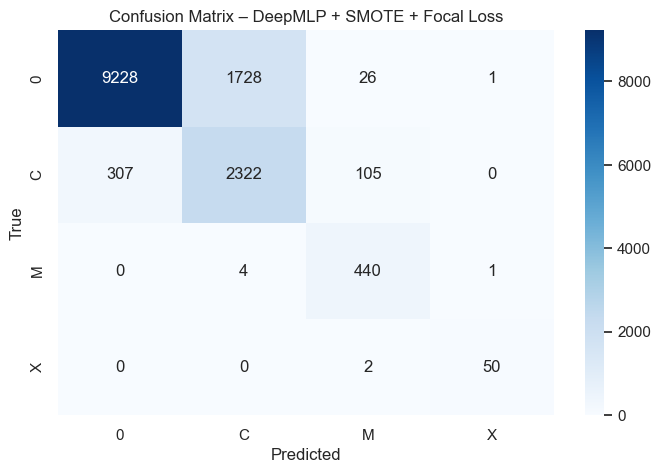

In [477]:
# 4. Test evaluation for SMOTE + Focal

test_loss_sm_focal, test_acc_sm_focal, test_f1_sm_focal, y_true_sm_focal, y_pred_sm_focal = run_epoch(
    model_sm_focal, test_loader, optimizer=None, criterion=criterion_sm_focal, train=False
)

print(f"SMOTE + Focal – Test Accuracy: {test_acc_sm_focal:.4f}")
print(f"SMOTE + Focal – Test Macro F1: {test_f1_sm_focal:.4f}")

print("\nSMOTE + Focal – Classification Report:")
print(classification_report(y_true_sm_focal, y_pred_sm_focal, target_names=["0","C","M","X"]))

cm_sm_focal = confusion_matrix(y_true_sm_focal, y_pred_sm_focal)
sns.heatmap(cm_sm_focal, annot=True, fmt="d", cmap="Blues",
            xticklabels=["0","C","M","X"], yticklabels=["0","C","M","X"])
plt.title("Confusion Matrix – DeepMLP + SMOTE + Focal Loss")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


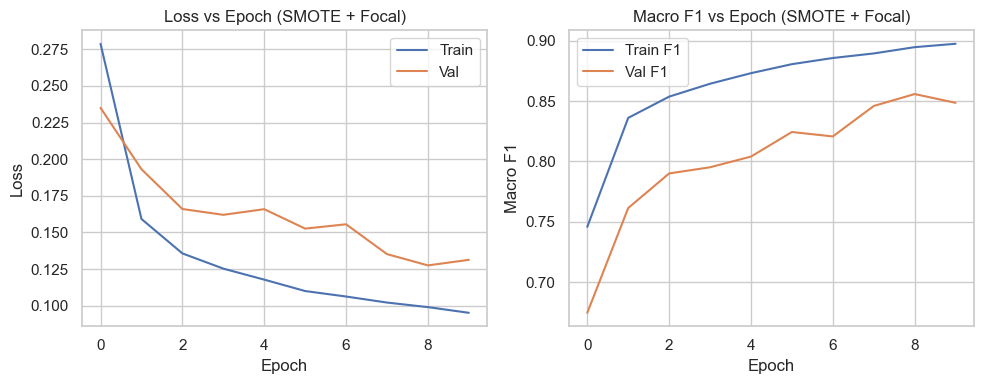

In [478]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(hist_sm_focal["train_loss"], label="Train")
plt.plot(hist_sm_focal["val_loss"], label="Val")
plt.title("Loss vs Epoch (SMOTE + Focal)")
plt.xlabel("Epoch"); plt.ylabel("Loss"); plt.legend()

plt.subplot(1,2,2)
plt.plot(hist_sm_focal["train_f1"], label="Train F1")
plt.plot(hist_sm_focal["val_f1"], label="Val F1")
plt.title("Macro F1 vs Epoch (SMOTE + Focal)")
plt.xlabel("Epoch"); plt.ylabel("Macro F1"); plt.legend()

plt.tight_layout()
plt.show()


## PARTIAL SMOTE + FOCAL

In [479]:
from imblearn.over_sampling import SMOTE
import pandas as pd

# original counts
class_counts = pd.Series(y_train).value_counts().sort_index()
print("Original train class counts:", class_counts.to_dict())

maj = class_counts[0]  # majority class size

sampling_strategy = {
    1: int(0.4 * maj),  # C  -> ~40% of class 0
    2: int(0.3 * maj),  # M  -> ~30% of class 0
    3: int(0.2 * maj),  # X  -> ~20% of class 0
}

print("Target counts (moderate SMOTE):", sampling_strategy)

smote_mod = SMOTE(
    sampling_strategy=sampling_strategy,
    random_state=RANDOM_STATE,
    k_neighbors=5
)

X_train_sm_mod, y_train_sm_mod = smote_mod.fit_resample(X_train, y_train)

print("After moderate SMOTE:", pd.Series(y_train_sm_mod).value_counts().sort_index().to_dict())


Original train class counts: {0: 51250, 1: 12761, 2: 2072, 3: 246}
Target counts (moderate SMOTE): {1: 20500, 2: 15375, 3: 10250}
After moderate SMOTE: {0: 51250, 1: 20500, 2: 15375, 3: 10250}


<Figure size 800x500 with 0 Axes>

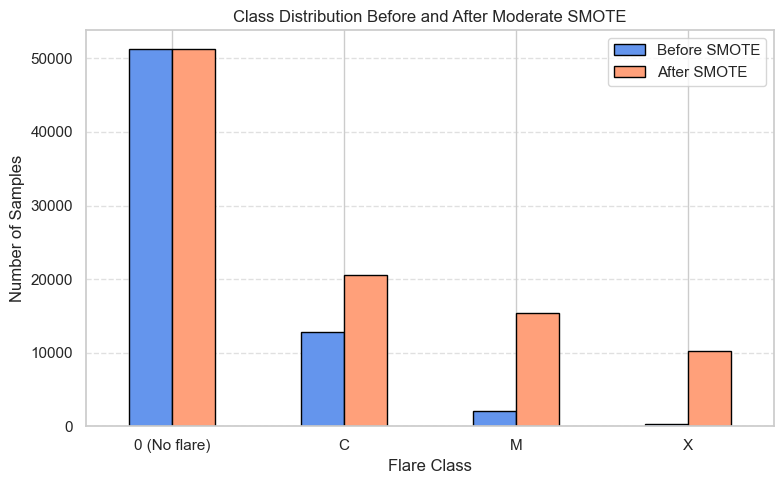

In [480]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Count class frequencies after SMOTE
counts_after = pd.Series(y_train_sm_mod).value_counts().sort_index()
counts_before = pd.Series(y_train).value_counts().sort_index()

# Create dataframe for side-by-side plot
df_counts = pd.DataFrame({
    'Before SMOTE': counts_before,
    'After SMOTE': counts_after
})
df_counts.index = ['0 (No flare)', 'C', 'M', 'X']

# Plot
plt.figure(figsize=(8,5))
df_counts.plot(kind='bar', color=['#6495ED', '#FFA07A'], edgecolor='black')
plt.title('Class Distribution Before and After Moderate SMOTE')
plt.ylabel('Number of Samples')
plt.xlabel('Flare Class')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()


In [481]:
# tensors for moderate SMOTE data
X_train_sm_mod_t = torch.tensor(X_train_sm_mod, dtype=torch.float32)
y_train_sm_mod_t = torch.tensor(y_train_sm_mod, dtype=torch.long)

train_ds_sm_mod = TensorDataset(X_train_sm_mod_t, y_train_sm_mod_t)
train_loader_sm_mod = DataLoader(train_ds_sm_mod, batch_size=batch_size, shuffle=True)

print("Original train size:", len(train_ds))
print("Moderate SMOTE train size:", len(train_ds_sm_mod))


Original train size: 66329
Moderate SMOTE train size: 97375


In [482]:
torch.manual_seed(RANDOM_STATE)

model_sm_mod = DeepMLP(
    input_dim=input_dim,
    hidden_dims=(256, 128, 64, 32),
    num_classes=4,
    dropout_p=0.3
).to(device)

criterion_sm_mod = FocalLoss(alpha=None, gamma=1.5)  # softer focus
optimizer_sm_mod = torch.optim.Adam(
    model_sm_mod.parameters(),
    lr=1e-3,
    weight_decay=1e-4
)

num_epochs = 10
hist_sm_mod = {"train_loss": [], "val_loss": [], "train_f1": [], "val_f1": []}
best_val_f1_sm_mod = -np.inf
best_state_sm_mod = None

patience = 4
patience_counter = 0

for epoch in range(1, num_epochs + 1):
    train_loss, train_acc, train_f1, _, _ = run_epoch(
        model_sm_mod, train_loader_sm_mod, optimizer_sm_mod, criterion_sm_mod, train=True
    )
    val_loss, val_acc, val_f1, _, _ = run_epoch(
        model_sm_mod, val_loader, optimizer_sm_mod, criterion_sm_mod, train=False
    )

    hist_sm_mod["train_loss"].append(train_loss)
    hist_sm_mod["val_loss"].append(val_loss)
    hist_sm_mod["train_f1"].append(train_f1)
    hist_sm_mod["val_f1"].append(val_f1)

    if val_f1 > best_val_f1_sm_mod:
        best_val_f1_sm_mod = val_f1
        best_state_sm_mod = model_sm_mod.state_dict()
        patience_counter = 0
    else:
        patience_counter += 1

    print(f"Epoch {epoch:02d} | Train F1={train_f1:.3f} | Val F1={val_f1:.3f}")

    if patience_counter > patience:
        print("Early stopping triggered")
        break

model_sm_mod.load_state_dict(best_state_sm_mod)
print("Best Val F1 (moderate SMOTE + focal):", best_val_f1_sm_mod)


Epoch 01 | Train F1=0.612 | Val F1=0.605
Epoch 02 | Train F1=0.751 | Val F1=0.690
Epoch 03 | Train F1=0.793 | Val F1=0.706
Epoch 04 | Train F1=0.815 | Val F1=0.756
Epoch 05 | Train F1=0.827 | Val F1=0.738
Epoch 06 | Train F1=0.838 | Val F1=0.791
Epoch 07 | Train F1=0.847 | Val F1=0.783
Epoch 08 | Train F1=0.853 | Val F1=0.801
Epoch 09 | Train F1=0.859 | Val F1=0.815
Epoch 10 | Train F1=0.864 | Val F1=0.812
Best Val F1 (moderate SMOTE + focal): 0.8153491115375121


In [483]:
test_loss_mod, test_acc_mod, test_f1_mod, y_true_mod, y_pred_mod = run_epoch(
    model_sm_mod, test_loader, optimizer=None, criterion=criterion_sm_mod, train=False
)

print(f"Moderate SMOTE + Focal – Test accuracy: {test_acc_mod:.4f}")
print(f"Moderate SMOTE + Focal – Test macro F1: {test_f1_mod:.4f}")
print(classification_report(y_true_mod, y_pred_mod, target_names=["0","C","M","X"]))


Moderate SMOTE + Focal – Test accuracy: 0.8884
Moderate SMOTE + Focal – Test macro F1: 0.8141
              precision    recall  f1-score   support

           0       0.92      0.96      0.94     10983
           C       0.79      0.59      0.68      2734
           M       0.67      0.99      0.80       445
           X       0.75      0.96      0.84        52

    accuracy                           0.89     14214
   macro avg       0.78      0.88      0.81     14214
weighted avg       0.89      0.89      0.88     14214



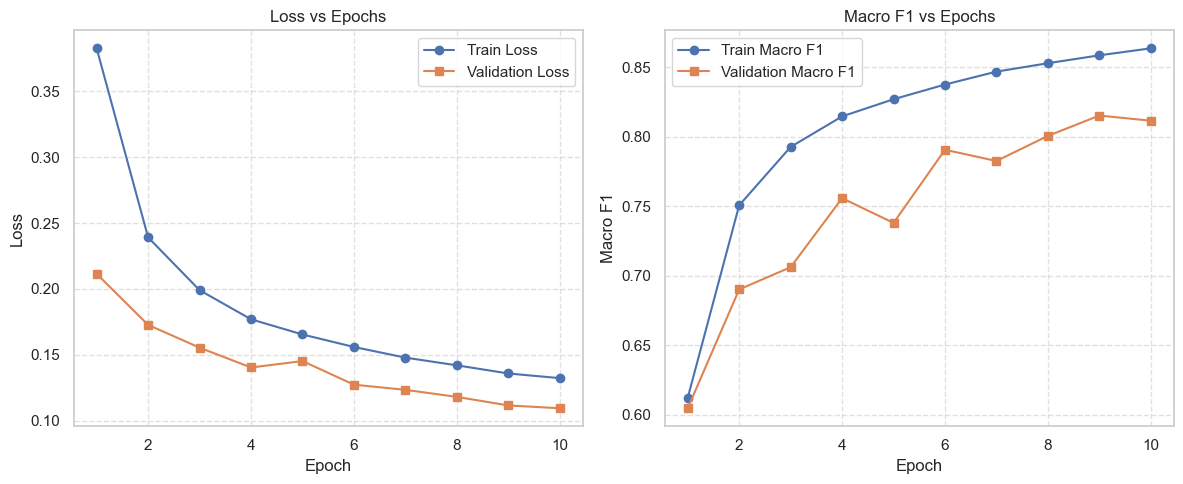

In [484]:
epochs = range(1, len(hist_sm_mod["train_f1"]) + 1)

plt.figure(figsize=(12, 5))

# 1. Loss Plot
plt.subplot(1, 2, 1)
plt.plot(epochs, hist_sm_mod["train_loss"], label="Train Loss", marker='o')
plt.plot(epochs, hist_sm_mod["val_loss"], label="Validation Loss", marker='s')
plt.title("Loss vs Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)

# 2. Macro F1 Plot
plt.subplot(1, 2, 2)
plt.plot(epochs, hist_sm_mod["train_f1"], label="Train Macro F1", marker='o')
plt.plot(epochs, hist_sm_mod["val_f1"], label="Validation Macro F1", marker='s')
plt.title("Macro F1 vs Epochs")
plt.xlabel("Epoch")
plt.ylabel("Macro F1")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)

plt.tight_layout()
plt.show()


### PLOTTING FINAL LATENT SPACE TO SEE THE CLUSTERING

In [485]:
import numpy as np
from sklearn.manifold import TSNE
import umap.umap_ as umap
import matplotlib.pyplot as plt
import seaborn as sns

model_sm_mod.eval()

embeddings = []
labels = []

with torch.no_grad():
    for xb, yb in test_loader:
        xb = xb.to(device)
        logits = model_sm_mod(xb)          # shape: [batch, 4]
        embeddings.append(logits.cpu().numpy())
        labels.append(yb.numpy())

embeddings = np.vstack(embeddings)   # [N, 4]
labels = np.hstack(labels)           # [N]
print("Embeddings shape:", embeddings.shape)


Embeddings shape: (14214, 4)


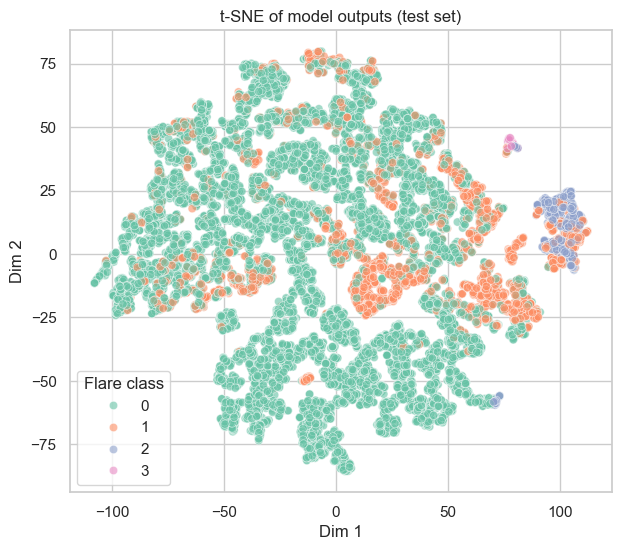

In [486]:
tsne = TSNE(n_components=2, perplexity=40, random_state=42)
X_tsne = tsne.fit_transform(embeddings)

plt.figure(figsize=(7,6))
sns.scatterplot(x=X_tsne[:,0], y=X_tsne[:,1],
                hue=labels, palette="Set2", alpha=0.6)
plt.title("t-SNE of model outputs (test set)")
plt.xlabel("Dim 1")
plt.ylabel("Dim 2")
plt.legend(title="Flare class")
plt.show()


c:\Users\admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


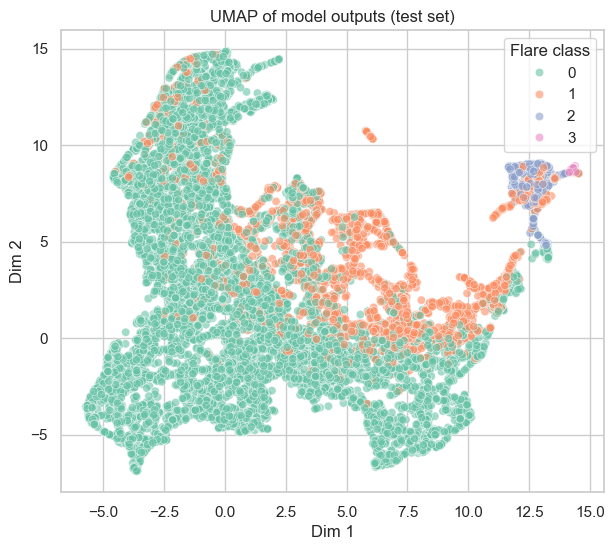

In [487]:
reducer = umap.UMAP(n_neighbors=20, min_dist=0.1, random_state=42)
X_umap = reducer.fit_transform(embeddings)

plt.figure(figsize=(7,6))
sns.scatterplot(x=X_umap[:,0], y=X_umap[:,1],
                hue=labels, palette="Set2", alpha=0.6)
plt.title("UMAP of model outputs (test set)")
plt.xlabel("Dim 1")
plt.ylabel("Dim 2")
plt.legend(title="Flare class")
plt.show()


# RES MLP

Reason for choosing ResMLP

The ResMLP adds residual skip connections between dense layers, helping the model:

Preserve important features across layers.

Avoid vanishing gradients.

Improve gradient flow and training stability when stacking deeper layers.

In essence, it allows deeper non-linear transformations while retaining earlier layer information — ideal for datasets where patterns overlap (like C vs. M flares).

→ By introducing residual paths, we expected better class boundary refinement, especially in the C–M transition zone that the DeepMLP struggled with.

## Without Smote + No Focal Loss

In [488]:
import torch
import torch.nn as nn
import torch.nn.functional as F


In [489]:
class ResidualBlock(nn.Module):
    def __init__(self, dim, dropout_p=0.3):
        super().__init__()
        self.fc1 = nn.Linear(dim, dim)
        self.bn1 = nn.BatchNorm1d(dim)
        self.fc2 = nn.Linear(dim, dim)
        self.bn2 = nn.BatchNorm1d(dim)
        self.dropout = nn.Dropout(dropout_p)

    def forward(self, x):
        identity = x

        out = self.fc1(x)
        out = self.bn1(out)
        out = F.relu(out)
        out = self.dropout(out)

        out = self.fc2(out)
        out = self.bn2(out)

        out = out + identity     # residual / skip connection
        out = F.relu(out)
        out = self.dropout(out)
        return out


class ResMLP(nn.Module):
    def __init__(self, input_dim, hidden_dim=256, num_blocks=3,
                 num_classes=4, dropout_p=0.3):
        super().__init__()

        # input projection
        self.input_layer = nn.Linear(input_dim, hidden_dim)
        self.input_bn = nn.BatchNorm1d(hidden_dim)
        self.dropout = nn.Dropout(dropout_p)

        # residual blocks
        self.blocks = nn.ModuleList([
            ResidualBlock(hidden_dim, dropout_p=dropout_p)
            for _ in range(num_blocks)
        ])

        # output head
        self.output_layer = nn.Linear(hidden_dim, num_classes)

    def forward(self, x):
        x = self.input_layer(x)
        x = self.input_bn(x)
        x = F.relu(x)
        x = self.dropout(x)

        for block in self.blocks:
            x = block(x)

        logits = self.output_layer(x)
        return logits


In [490]:
torch.manual_seed(RANDOM_STATE)

input_dim = X_train.shape[1]
num_classes = 4

res_model_no_smote = ResMLP(
    input_dim=input_dim,
    hidden_dim=256,
    num_blocks=3,
    num_classes=num_classes,
    dropout_p=0.3
).to(device)


In [491]:
import pandas as pd

# compute inverse-frequency class weights
class_counts = pd.Series(y_train).value_counts().sort_index()
inv_freq = 1.0 / class_counts
weights = (inv_freq / inv_freq.sum()).values
class_weights_ce = torch.tensor(weights, dtype=torch.float32).to(device)

criterion_ce = nn.CrossEntropyLoss(weight=class_weights_ce)


In [492]:
from torch.utils.data import TensorDataset, DataLoader

# No SMOTE here
X_train_t = torch.tensor(X_train, dtype=torch.float32)
y_train_t = torch.tensor(y_train, dtype=torch.long)

train_ds_no_smote = TensorDataset(X_train_t, y_train_t)
train_loader_no_smote = DataLoader(train_ds_no_smote, batch_size=batch_size, shuffle=True)


In [493]:
optimizer_ce = torch.optim.Adam(
    res_model_no_smote.parameters(),
    lr=1e-3,
    weight_decay=1e-4
)

num_epochs = 10
hist_res_no_smote = {"train_loss": [], "val_loss": [], "train_f1": [], "val_f1": []}
best_val_f1_res_no_smote = -float("inf")
best_state_res_no_smote = None
patience = 4
patience_counter = 0

for epoch in range(1, num_epochs + 1):
    train_loss, train_acc, train_f1, _, _ = run_epoch(
        res_model_no_smote, train_loader_no_smote, optimizer_ce, criterion_ce, train=True
    )
    val_loss, val_acc, val_f1, _, _ = run_epoch(
        res_model_no_smote, val_loader, optimizer_ce, criterion_ce, train=False
    )

    hist_res_no_smote["train_loss"].append(train_loss)
    hist_res_no_smote["val_loss"].append(val_loss)
    hist_res_no_smote["train_f1"].append(train_f1)
    hist_res_no_smote["val_f1"].append(val_f1)

    if val_f1 > best_val_f1_res_no_smote:
        best_val_f1_res_no_smote = val_f1
        best_state_res_no_smote = res_model_no_smote.state_dict()
        patience_counter = 0
    else:
        patience_counter += 1

    print(f"Epoch {epoch:02d} | Train F1={train_f1:.3f} | Val F1={val_f1:.3f}")

    if patience_counter > patience:
        print("Early stopping triggered (no SMOTE)")
        break

res_model_no_smote.load_state_dict(best_state_res_no_smote)
print("Best Val F1 (ResMLP, no SMOTE, no Focal):", best_val_f1_res_no_smote)


Epoch 01 | Train F1=0.328 | Val F1=0.412
Epoch 02 | Train F1=0.381 | Val F1=0.435
Epoch 03 | Train F1=0.410 | Val F1=0.437
Epoch 04 | Train F1=0.421 | Val F1=0.431
Epoch 05 | Train F1=0.442 | Val F1=0.431
Epoch 06 | Train F1=0.453 | Val F1=0.511
Epoch 07 | Train F1=0.471 | Val F1=0.521
Epoch 08 | Train F1=0.489 | Val F1=0.501
Epoch 09 | Train F1=0.495 | Val F1=0.539
Epoch 10 | Train F1=0.515 | Val F1=0.527
Best Val F1 (ResMLP, no SMOTE, no Focal): 0.5387201924016478


In [494]:
from sklearn.metrics import classification_report

test_loss_no_smote, test_acc_no_smote, test_f1_no_smote, y_true_no_smote, y_pred_no_smote = run_epoch(
    res_model_no_smote, test_loader, optimizer=None, criterion=criterion_ce, train=False
)

print(f"ResMLP (no SMOTE, no Focal) – Test accuracy: {test_acc_no_smote:.4f}")
print(f"ResMLP (no SMOTE, no Focal) – Test macro F1: {test_f1_no_smote:.4f}")
print(classification_report(y_true_no_smote, y_pred_no_smote, target_names=['0','C','M','X']))


ResMLP (no SMOTE, no Focal) – Test accuracy: 0.7716
ResMLP (no SMOTE, no Focal) – Test macro F1: 0.5242
              precision    recall  f1-score   support

           0       0.92      0.83      0.87     10983
           C       0.54      0.51      0.52      2734
           M       0.27      0.86      0.42       445
           X       0.17      0.98      0.28        52

    accuracy                           0.77     14214
   macro avg       0.47      0.79      0.52     14214
weighted avg       0.82      0.77      0.79     14214



In [495]:
import numpy as np
from sklearn.manifold import TSNE
import umap.umap_ as umap
import matplotlib.pyplot as plt
import seaborn as sns

res_model_no_smote.eval()

embeddings_res_model_no_smote = []
labels_res_model_no_smote = []

with torch.no_grad():
    for xb, yb in test_loader:
        xb = xb.to(device)
        logits = res_model_no_smote(xb)          # shape: [batch, 4]
        embeddings_res_model_no_smote.append(logits.cpu().numpy())
        labels_res_model_no_smote.append(yb.numpy())

embeddings_res_model_no_smote = np.vstack(embeddings_res_model_no_smote)   # [N, 4]
labels_res_model_no_smote = np.hstack(labels_res_model_no_smote)           # [N]
print("Embeddings shape:", embeddings_res_model_no_smote.shape)

Embeddings shape: (14214, 4)


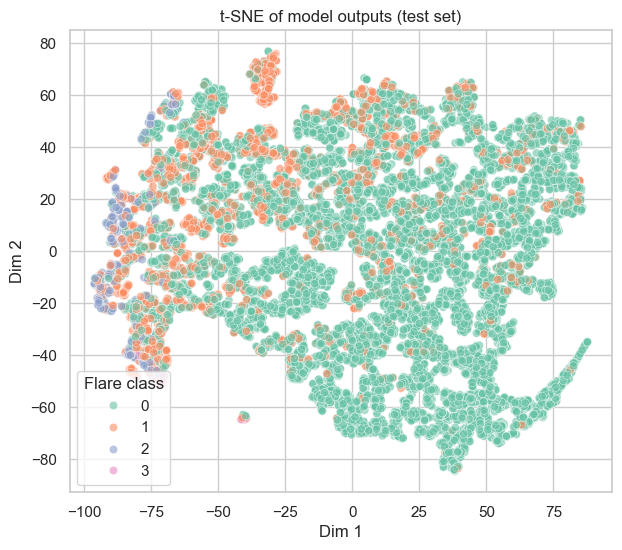

In [496]:
tsne_resmlp_no_fl_sm = TSNE(n_components=2, perplexity=40, random_state=42)
X_tsne_resmlp_no_fl_sm = tsne_resmlp_no_fl_sm.fit_transform(embeddings_res_model_no_smote)

plt.figure(figsize=(7,6))
sns.scatterplot(x=X_tsne_resmlp_no_fl_sm[:,0], y=X_tsne_resmlp_no_fl_sm[:,1],
                hue=labels, palette="Set2", alpha=0.6)
plt.title("t-SNE of model outputs (test set)")
plt.xlabel("Dim 1")
plt.ylabel("Dim 2")
plt.legend(title="Flare class")
plt.show()


c:\Users\admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


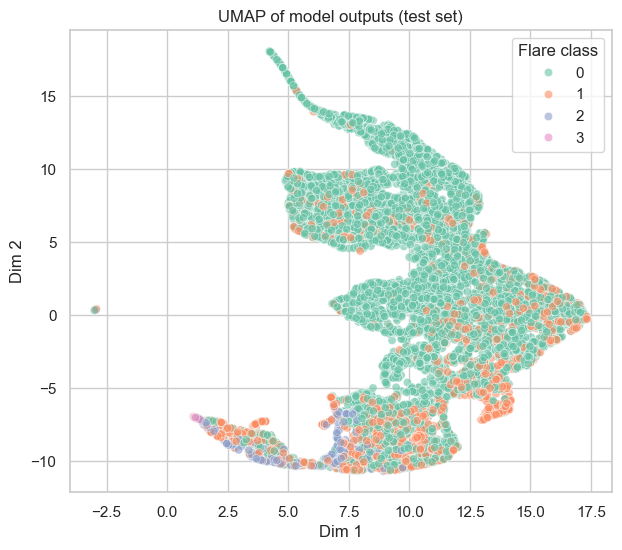

In [497]:
reducer_no = umap.UMAP(n_neighbors=20, min_dist=0.1, random_state=42)
X_umap_no = reducer_no.fit_transform(embeddings_res_model_no_smote)

plt.figure(figsize=(7,6))
sns.scatterplot(x=X_umap_no[:,0], y=X_umap_no[:,1],
                hue=labels, palette="Set2", alpha=0.6)
plt.title("UMAP of model outputs (test set)")
plt.xlabel("Dim 1")
plt.ylabel("Dim 2")
plt.legend(title="Flare class")
plt.show()


## ResMLP + Moderate SMOTE + Focal Loss

In [498]:
from imblearn.over_sampling import SMOTE
import pandas as pd

# original train labels
class_counts = pd.Series(y_train).value_counts().sort_index()
print("Original train class counts:", class_counts.to_dict())

maj = class_counts[0]  # majority class (0)

# target counts for moderate oversampling (not fully balanced)
sampling_strategy = {
    1: int(0.4 * maj),  # C  ~ 40% of 0
    2: int(0.3 * maj),  # M  ~ 30% of 0
    3: int(0.2 * maj),  # X  ~ 20% of 0
}

print("Target counts (moderate SMOTE):", sampling_strategy)

smote_mod = SMOTE(
    sampling_strategy=sampling_strategy,
    random_state=RANDOM_STATE,
    k_neighbors=5
)

X_train_sm_mod, y_train_sm_mod = smote_mod.fit_resample(X_train, y_train)

print("After moderate SMOTE:", pd.Series(y_train_sm_mod).value_counts().sort_index().to_dict())


Original train class counts: {0: 51250, 1: 12761, 2: 2072, 3: 246}
Target counts (moderate SMOTE): {1: 20500, 2: 15375, 3: 10250}
After moderate SMOTE: {0: 51250, 1: 20500, 2: 15375, 3: 10250}


In [499]:
from torch.utils.data import TensorDataset, DataLoader

X_train_sm_mod_t = torch.tensor(X_train_sm_mod, dtype=torch.float32)
y_train_sm_mod_t = torch.tensor(y_train_sm_mod, dtype=torch.long)

train_ds_sm_mod = TensorDataset(X_train_sm_mod_t, y_train_sm_mod_t)
train_loader_sm_mod = DataLoader(train_ds_sm_mod, batch_size=batch_size, shuffle=True)

print("Moderate SMOTE train size:", len(train_ds_sm_mod))


Moderate SMOTE train size: 97375


In [500]:
# assumes FocalLoss and run_epoch are already defined

torch.manual_seed(RANDOM_STATE)

input_dim = X_train.shape[1]
num_classes = 4

res_model = ResMLP(
    input_dim=input_dim,
    hidden_dim=256,
    num_blocks=3,
    num_classes=num_classes,
    dropout_p=0.3
).to(device)

# Focal Loss – yes, we use focal here
criterion_res = FocalLoss(alpha=None, gamma=1.5)

optimizer_res = torch.optim.Adam(
    res_model.parameters(),
    lr=1e-3,
    weight_decay=1e-4
)

num_epochs = 10
hist_res = {"train_loss": [], "val_loss": [], "train_f1": [], "val_f1": []}
best_val_f1_res = -float("inf")
best_state_res = None
patience = 4
patience_counter = 0

for epoch in range(1, num_epochs + 1):
    # TRAIN on SMOTE data
    train_loss, train_acc, train_f1, _, _ = run_epoch(
        res_model, train_loader_sm_mod, optimizer_res, criterion_res, train=True
    )

    # VALIDATE on original val set (no SMOTE)
    val_loss, val_acc, val_f1, _, _ = run_epoch(
        res_model, val_loader, optimizer_res, criterion_res, train=False
    )

    hist_res["train_loss"].append(train_loss)
    hist_res["val_loss"].append(val_loss)
    hist_res["train_f1"].append(train_f1)
    hist_res["val_f1"].append(val_f1)

    if val_f1 > best_val_f1_res:
        best_val_f1_res = val_f1
        best_state_res = res_model.state_dict()
        patience_counter = 0
    else:
        patience_counter += 1

    print(f"Epoch {epoch:02d} | Train F1={train_f1:.3f} | Val F1={val_f1:.3f}")

    if patience_counter > patience:
        print("Early stopping triggered")
        break

res_model.load_state_dict(best_state_res)
print("Best Val F1 (ResMLP + moderate SMOTE + focal):", best_val_f1_res)


Epoch 01 | Train F1=0.637 | Val F1=0.567
Epoch 02 | Train F1=0.761 | Val F1=0.621
Epoch 03 | Train F1=0.801 | Val F1=0.746
Epoch 04 | Train F1=0.824 | Val F1=0.740
Epoch 05 | Train F1=0.838 | Val F1=0.775
Epoch 06 | Train F1=0.850 | Val F1=0.823
Epoch 07 | Train F1=0.862 | Val F1=0.836
Epoch 08 | Train F1=0.869 | Val F1=0.822
Epoch 09 | Train F1=0.874 | Val F1=0.845
Epoch 10 | Train F1=0.880 | Val F1=0.845
Best Val F1 (ResMLP + moderate SMOTE + focal): 0.8452940548422866


In [501]:
from sklearn.metrics import classification_report

test_loss_res, test_acc_res, test_f1_res, y_true_res, y_pred_res = run_epoch(
    res_model, test_loader, optimizer=None, criterion=criterion_res, train=False
)

print(f"ResMLP + moderate SMOTE + focal – Test accuracy: {test_acc_res:.4f}")
print(f"ResMLP + moderate SMOTE + focal – Test macro F1: {test_f1_res:.4f}")
print(classification_report(y_true_res, y_pred_res, target_names=["0","C","M","X"]))


ResMLP + moderate SMOTE + focal – Test accuracy: 0.8821
ResMLP + moderate SMOTE + focal – Test macro F1: 0.8365
              precision    recall  f1-score   support

           0       0.94      0.92      0.93     10983
           C       0.70      0.70      0.70      2734
           M       0.66      0.99      0.79       445
           X       0.85      1.00      0.92        52

    accuracy                           0.88     14214
   macro avg       0.79      0.90      0.84     14214
weighted avg       0.89      0.88      0.88     14214



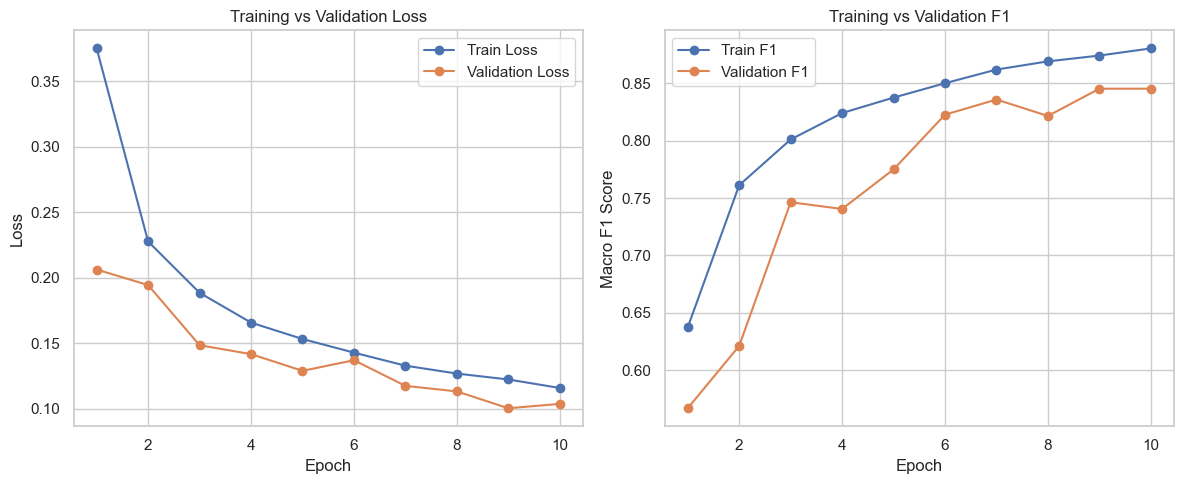

In [502]:
import matplotlib.pyplot as plt

# --- Training history dictionary ---
# hist_res = {
#     "train_loss": [...],
#     "val_loss": [...],
#     "train_f1": [...],
#     "val_f1": [...]
# }

epochs = range(1, len(hist_res["train_loss"]) + 1)

plt.figure(figsize=(12,5))

# --- Loss plot ---
plt.subplot(1,2,1)
plt.plot(epochs, hist_res["train_loss"], label="Train Loss", marker="o")
plt.plot(epochs, hist_res["val_loss"], label="Validation Loss", marker="o")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss")
plt.legend()
plt.grid(True)

# --- F1 plot ---
plt.subplot(1,2,2)
plt.plot(epochs, hist_res["train_f1"], label="Train F1", marker="o")
plt.plot(epochs, hist_res["val_f1"], label="Validation F1", marker="o")
plt.xlabel("Epoch")
plt.ylabel("Macro F1 Score")
plt.title("Training vs Validation F1")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


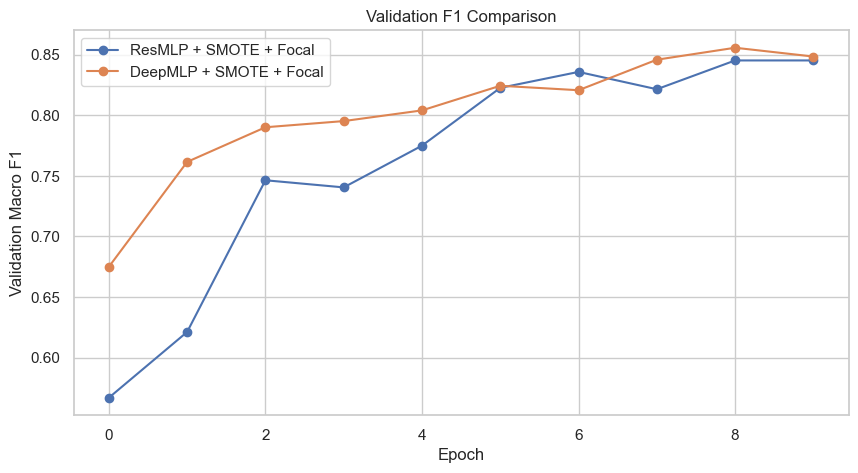

In [503]:
plt.figure(figsize=(10,5))
plt.plot(hist_res["val_f1"], label="ResMLP + SMOTE + Focal", marker="o")
plt.plot(hist_sm_focal["val_f1"], label="DeepMLP + SMOTE + Focal", marker="o")
plt.xlabel("Epoch")
plt.ylabel("Validation Macro F1")
plt.title("Validation F1 Comparison")
plt.legend()
plt.grid(True)
plt.show()


In [504]:
import numpy as np
from sklearn.manifold import TSNE
import umap.umap_ as umap
import matplotlib.pyplot as plt
import seaborn as sns

res_model.eval()

embeddings_res_model = []
labels_res_model = []

with torch.no_grad():
    for xb, yb in test_loader:
        xb = xb.to(device)
        logits = res_model(xb)          # shape: [batch, 4]
        embeddings_res_model.append(logits.cpu().numpy())
        labels_res_model.append(yb.numpy())

embeddings_res_model = np.vstack(embeddings_res_model)   # [N, 4]
labels_res_model = np.hstack(labels_res_model)           # [N]
print("Embeddings shape:", embeddings_res_model.shape)

Embeddings shape: (14214, 4)


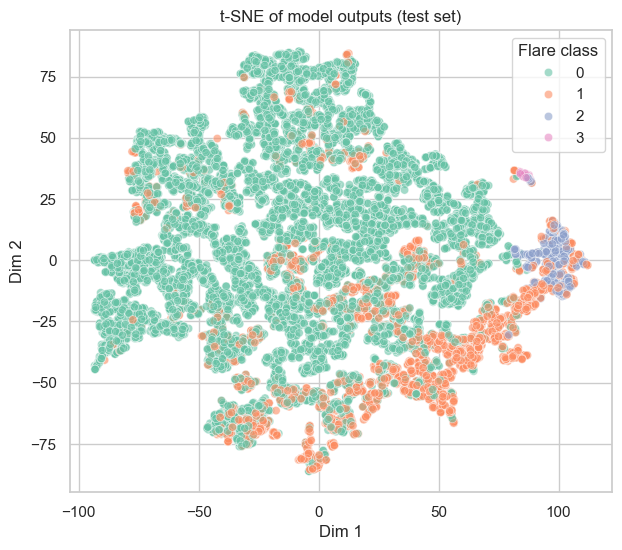

In [505]:
tsne_resmlp_fl_sm = TSNE(n_components=2, perplexity=40, random_state=42)
X_tsne_resmlp_fl_sm = tsne_resmlp_fl_sm.fit_transform(embeddings_res_model)

plt.figure(figsize=(7,6))
sns.scatterplot(x=X_tsne_resmlp_fl_sm[:,0], y=X_tsne_resmlp_fl_sm[:,1],
                hue=labels, palette="Set2", alpha=0.6)
plt.title("t-SNE of model outputs (test set)")
plt.xlabel("Dim 1")
plt.ylabel("Dim 2")
plt.legend(title="Flare class")
plt.show()


c:\Users\admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


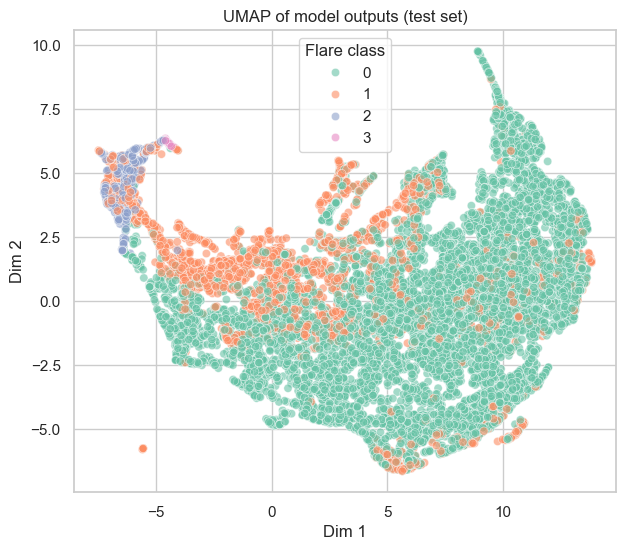

In [506]:
reducer_both = umap.UMAP(n_neighbors=20, min_dist=0.1, random_state=42)
X_umap_both = reducer_both.fit_transform(embeddings_res_model)

plt.figure(figsize=(7,6))
sns.scatterplot(x=X_umap_both[:,0], y=X_umap_both[:,1],
                hue=labels, palette="Set2", alpha=0.6)
plt.title("UMAP of model outputs (test set)")
plt.xlabel("Dim 1")
plt.ylabel("Dim 2")
plt.legend(title="Flare class")
plt.show()
